# Homework 2

This is a homework assignment on the material from the 6th-9th classes. The deadline for submission is __23:59 on October 29__.

- The homework is done in the same Jupyter Notebook.

- The file should be renamed: __Group Number_First Name_Last Name__ (no spaces at the beginning or end). Example: __000_Ivan_Ivanov__.

- Homework should be sent to __OptimizationHomework@yandex.ru__. Subject line: __Innopolis_Task number__ (without spaces at the beginning and end). For this assignment, the subject line is: __Innopolis_2__.

- Place the solution to each problem/item after the condition.

- Do not forget to add necessary explanations and comments.

- All technical artifacts should be removed in the final version that will be sent for checking. By such artifacts we mean any cell outputs that are not commented in any way in the text, as well as any bulk/long technical output (even if it is commented in the text).

- A full run of the solution (Kernel -> Restart & Run All) should run all cells without errors.

- The maximum score for the assignment is 100.

We wish you success!

### Part 1. Solving the unconstrained optimization problem

Consider the problem of empirical risk minimization:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n \ell (g(w, x_i), y_i) + \frac{\lambda}{2} \| w \|^2_2,
\end{equation}
where $\ell$ is the loss function, $g$ is the model, $w$ is the model parameters, $\{x_i, y_i\}_{i=1}^n$ is the data sample from feature vectors $x_i$ and labels $y_i$, $\lambda > 0$ is the regularization parameter.

We use the linear model $g(w, x) = w^T x$ and the logistic/sigmoidal loss function: $\ell(z,y) = \ln (1 + \exp(-yz))$ (Important: $y$ must take values $-1$ or $1$). The resulting problem is called a logistic regression problem. 

__Problem 1. (20 points)__ Let us do some preparation work. 

__а). (15 points)__ Write out the gradient and the Hessian for this problem. Is the problem convex? Is $\mu$ strongly convex? If so, how can $\mu$ be estimated? Estimate the Lipschitz constant of the gradient $L$. 

Consider one element of the given sum separately:

$$
f_i(w) =  \ell (g(w, x_i), y_i) + \frac{\lambda}{2} \| w \|^2_2,
$$

$$
\frac{\partial f_i}{\partial w} = \frac{\partial g(w, x_i)}{\partial w} \times \frac{\partial \ell(g(w, x_i), y_i)}{\partial g(w, x_i)} 
$$

$$
\frac{\partial g(w, x_i)}{\partial w} = \frac{\partial w^Tx_i}{\partial w} = x_i 
$$

$$
\frac{\partial \ell(w^Tx_i, y_i)}{\partial w^Tx_i} = \frac{\partial \ln (1 + \exp(-y_iw^Tx_i))}{\partial w^Tx_i}   = \frac{-y_i e^{-y_iw^Tx_i}}{1 + e^{-y_iw^Tx_i}}  = \frac{-y_i}{e^{y_iw^Tx_i} + 1}
$$
And from the above we get the gradient of the given function as:

$$
\nabla f_i(w) = \frac{-y_ix_i}{e^{y_iw^Tx_i} + 1} \Rightarrow \nabla f = \frac{1}{n} \sum \limits_{i=1}^{n} \frac{-y_ix_i}{e^{y_iw^Tx_i} + 1} + \lambda w
$$

Considering the obtained gradient we may noitice:

$$
\nabla f = \frac{1}{n} \sum \limits_{i=1}^{n} -y_ix_i \sigma{(-w^Tx_iy_i)} + \lambda w, \text{ where $\sigma(x)$ is the sigmoid function, } \sigma(x) = \frac{1}{1 + e^{-x}}
$$

---

It is known, that derivative of the sigmoid function is defined as $\frac{\partial \sigma(x)}{\partial x} = \sigma(x)(1 - \sigma(x))$. And using this we can count Hessian matrix for the given function:

$$
\frac{\partial^2 f(w)}{\partial w^2} = \frac{1}{n} \sum \limits_{i=1}^{n} -y_ix_i(-y_ix_i)\sigma{(-w^Tx_iy_i)} \left( 1 - \sigma{(-w^Tx_iy_i)} \right) + \lambda
$$

Using the properti of the sigmoid $\sigma(-x) = 1 - \sigma(x)$ we get:

$$
\frac{\partial^2 f(w)}{\partial w^2} = \frac{1}{n} \sum \limits_{i=1}^{n} -y_ix_i(-y_ix_i) \left(1 - \sigma(w^Tx_iy_i) \right) \sigma{(w^Tx_iy_i)} + \lambda = 
\frac{1}{n} \sum \limits_{i=1}^{n} y_i^2x_ix_i^T \left(\sigma(w^Tx_iy_i) - \sigma^2(w^Tx_iy_i) \right) + \lambda
$$

$$
\nabla^2 f(w) = \frac{1}{n} \sum \limits_{i=1}^{n} y_i^2x_ix_i^T \left(\sigma(w^Tx_iy_i) - \sigma^2(w^Tx_iy_i) \right) + \lambda
$$

Term $y_i^2$ can be ommited as it's always 1 by defenition

All the terms of the result Hessian is non-negative:
* $x_ix_i^T$ - as it's quadratic term
* $\left(\sigma(w^Tx_iy_i) - \sigma^2(w^Tx_iy_i) \right)$ - as $\forall x \in \mathbb{R}: \sigma(x) \in (-1, 1)$
* $\lambda$ - as it's tuned parameter, by defenition nonnegative

We can see what term $\sum \limits_{i=1}^{n} x_ix_i^T$ is equivalent to concatenating column vectors $x \in \mathbb{R}^d$ into a matrix $X$ of size $d \times m$ such that $\sum \limits_{i=1}^{n}x_ix_i^T = XX^T$

We can rewrite This expression in the matrix form as:
$$
H(f(w)) = \frac{1}{n} XDX^T + \lambda{I}
$$

Where $D$ is diagonal matrix with the elements:

$$
D_{ii} = \left(\sigma(w^Tx_iy_i) - \sigma^2(w^Tx_iy_i) \right)
$$

To verify that $XDX^T$ is covex function we can use the following. Factorazing matrix $D = D^{\frac{1}{2}}D^{\frac{1}{2}}$ we can get the following:

$$
XDX^T = XD^{\frac{1}{2}}D^{\frac{1}{2}}X^T = (XD^{\frac{1}{2}})(XD^{\frac{1}{2}})^T 
$$

From this we can see that the obtained matrix is Positive semidefinite as $\forall \delta: \delta(XD^{\frac{1}{2}})(XD^{\frac{1}{2}})^T \delta \geq 0$. **Thus Logistic regression is convex function.**

---

$L$ smoothness constant of the function is equal to the $\lambda_{max}$ of the Hessian:

$$
\frac{1}{n} XDX^T + \lambda{I}
$$

$D$ is diagonal matrix with bounded values $\sigma(w^Tx_iy_i) - \sigma^2(w^Tx_iy_i) $ is concave function as $\sigma(x) \in (0 \dots 1)$. Thus we can find the maximum point of this function by taking it's derivative and finding it's 0.


Lets assume $z = w^Tx_iy_i$ for simplisity

$$
\frac{\partial \left( \sigma(w^Tx_iy_i) - \sigma^2(w^Tx_iy_i \right)}{\partial w} = 0 \Leftrightarrow
$$


$$
\Leftrightarrow y_ix_i \sigma(z)(1 - \sigma(z))(1 - \sigma(z)) - y_ix_i \sigma(z)(1 - \sigma(z)) \sigma(z) = 0 \Leftrightarrow 
$$

$$
\Leftrightarrow y_ix_i\left[\sigma(z) \sigma^2(-z) - \sigma^2(z) \sigma(-z) \right] = 0 \Leftrightarrow 
$$

$$
\Leftrightarrow y_ix_i \sigma(z)\sigma(-z) \left[ \sigma(-z) - \sigma(z)\right] = 0
$$

The last expression holds only if $\sigma(-z) = \sigma(z) \Rightarrow \sigma(z) = \frac{1}{2} \Rightarrow \sigma(z) - \sigma^2(z) = \frac{1}{4}$

Summing up all above we get the following $L$ smoothness constant for the logistic regression function: 

$$
\frac{1}{4n} XX^T + \lambda{I}
$$

And from this we get the **Estimated value of the smoothness constant** $L = \frac{1}{4n} \lambda_{max}(XX^T) + \lambda$, where $\lambda_{max}$ - maximum eigenvalue of the matrix 

$\sigma(w^Tx_iy_i) - \sigma^2(w^Tx_iy_i) $ minimal value = $0$ as $\sigma(x) \in (0 \dots 1)$. And from this we can get the strong convexity constant for the given function:

$$
\frac{1}{4n} \lambda_{min}(XX^T) + \lambda{I} =  \lambda
$$

And from this we get the following:

$$
\mu \leq \nabla^2f(w) \leq L, \text{ where }
$$

$$
\mu = \lambda, L = \frac{1}{4n} \lambda_{max}(XX^T) + \lambda
$$

The _mushrooms_ dataset is attached. Use the following code to generate a matrix $X$ and vector $y$, which will store the sample $\{x_i, y_i\}_{i=1}^n$:

In [1]:
import numpy as np
from numpy.typing import ArrayLike

dataset = "mushrooms.txt"
from lovely_numpy import lo
from tqdm import tqdm
import matplotlib.pyplot as plt

np.random.seed(42)
import time

# the file must be in the same directory as notebook.

In [2]:
from sklearn.datasets import load_svmlight_file

data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]

Let us change the vector $y$ so that $y_i$ takes values $-1$ and $1$. You can also do additional preprocessing of the data (with techniques from machine learning), but this is not additionally assessed in any way.

In [3]:
y = 2 * y - 3

Let us divide the data into two parts: training and test.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

__b). (5 points)__ For the training part $X_{train}$, $y_{train}$, estimate the constant $L$. Set $\lambda$ such that $\lambda \approx L / 1000$.  Realize in the code the calculation of the value, gradient and Hessian for our target function ($X$, $y$, $\lambda$ should be given as a parameter so that it is possible to change them, not only to substitute fixed $X_{train}$, $y_{train}$).

In [5]:
def sigmoid(x: ArrayLike) -> np.float32:
    return 1 / (1 + np.exp(-x))


def logistic(
    w: ArrayLike,
    X: ArrayLike = X_train,
    y: ArrayLike = y_train,
    reg_lambda: np.float32 = 0,
) -> np.float32:
    n = X.shape[0]
    z = X @ w  # Matrix multiplication of X and w, z will be a column vector
    l = np.log(1 + np.exp(-y * z))  # Vectorized computation for all elements
    f = np.mean(l) + (reg_lambda / 2) * np.linalg.norm(w) ** 2
    return f


def logistic_grad(
    w: ArrayLike,
    X: ArrayLike = X_train,
    y: ArrayLike = y_train,
    reg_lambda: np.float32 = 0,
) -> ArrayLike:
    n = X.shape[0]

    # Calculate the sigmoid values for all samples
    z = X @ w
    sigmoid_vals = sigmoid(-y * z)

    # Compute the gradient
    error = sigmoid_vals * (-y)
    grad = X.T @ error
    grad /= n

    # Add the regularization term
    regularization_term = reg_lambda * w
    grad += regularization_term

    return grad


def logistic_hessian(
    w: ArrayLike,
    X: ArrayLike = X_train,
    y: ArrayLike = y_train,
    reg_lambda: np.float32 = 0,
) -> ArrayLike:
    n = X.shape[0]
    d = X.shape[1]

    # Compute the sigmoid values
    z = X @ w
    sigmoid_vals = sigmoid(z)

    # Calculate the diagonal matrix of the second derivatives
    D = np.diag(sigmoid_vals * (1 - sigmoid_vals))

    # Compute the Hessian
    hessian = X.T @ D @ X

    # Add regularization term to the diagonal elements
    regularization_matrix = reg_lambda * np.identity(d)
    hessian /= n
    hessian += regularization_matrix
    return hessian

In [6]:
def logistic_smoothness(X, reg_lambda=0):
    L = 0
    n = X.shape[0]
    L = np.max(
        np.linalg.eigvalsh(X.T @ X)
    )  # X here have shape (n, d), so we should transpose both X's
    L /= 4 * n
    L += reg_lambda
    return L


L_wo_reg = logistic_smoothness(X_train)
reg_lambda = L_wo_reg / 1000
print(f"Regularizer value λ - {reg_lambda}")
L_with_reg = logistic_smoothness(X_train, reg_lambda)
L_wo_reg, L_with_reg

Regularizer value λ - 0.002584638862872305


(2.584638862872305, 2.5872235017351777)

__Problem 2. (20 points)__ This part of the assignment is related to momentum and acceleration.

__a). (5 points)__ Implement the heavy ball method and Nesterov's accelerated gradient method. 

Just in case, we give here a variant of the function description for the gradient descent from the first assignment. You can use this format if you wish. Note that ``x_sol`` occurs in the code - this problem should be solved or criteria tied to ``x_sol`` should not be used.

In [7]:
def model_predictions(w, X=X_test):
    sigma = sigmoid(
        X @ w.T
    )  # get model results and take a sigmoid over it to get class probabilities
    sigma[sigma >= 0.5] = 1  # right part of the sigmoid -> class is 1
    sigma[sigma < 0.5] = -1  # left part of the sigmoid -> class is -1
    return sigma


def calc_accuracy(y_pred, y_true=y_test):
    return np.sum(y_pred == y_true) / len(y_true)


def heavy_ball(
    f,  # Objective function to be minimized.
    nabla_f,  # Gradient (or derivative) of the objective function.
    x_0,  # Initial guess or starting point for optimization.
    alpha,  # Learning rate (step size) for gradient descent.
    beta,  # Momentum parameter.
    K=10**3,  # Maximum number of iterations.
    eps=1e-3,  # Convergence threshold.
    reg=0,  # Regularization parameter (default is 0).
    X=None,  # Optional input data for the objective function.
    y=None,  # Optional target values for the objective function.
    acc=False,
):
    if X is not None and y is not None:
        # If input data X and target values y are provided, create a new objective function
        # and gradient that incorporate these data.
        F = lambda w: f(w, X, y)
        Nabla_f = lambda w: nabla_f(w, X, y)
    else:
        # Otherwise, use the original objective function and gradient without data.
        F = lambda w: f(w, reg_lambda=reg)
        Nabla_f = lambda w: nabla_f(w, reg_lambda=reg)

    # Initialize the previous and current solutions.
    x_k_prev = x_0
    x_k = x_k_prev - alpha * Nabla_f(x_k_prev)

    # Calculate the initial gradient norm.
    init_grad_norm = np.linalg.norm(Nabla_f(x_k_prev))

    # Record the initial time for optimization time calculation.
    init_time = time.time()

    # Initialize lists to track optimization progress.
    history = [init_grad_norm]
    time_tiks = [0]
    accs = []
    if acc:
        pred = model_predictions(x_k)
        cur_accuracy = calc_accuracy(pred)
        accs.append(cur_accuracy)

    progress = tqdm(range(1, K + 1))

    for k in progress:
        # Calculate the next solution using gradient descent with momentum.
        x_k_next = x_k - alpha * Nabla_f(x_k) + beta(k) * (x_k - x_k_prev)

        # Calculate the loss using the updated solution.
        loss = F(x_k_next)

        # Calculate the normalized gradient norm.
        grad_norm = np.linalg.norm(Nabla_f(x_k_next)) / init_grad_norm

        # Check for convergence based on the gradient norm.
        is_converge = grad_norm <= eps

        if is_converge:
            # If convergence is achieved, record the progress and time.
            history.append(grad_norm)
            time_tiks.append(time.time() - init_time)
            if acc:
                pred = model_predictions(x_k)
                cur_accuracy = calc_accuracy(pred)
                accs.append(cur_accuracy)
            return x_k_next, np.array(history), k, time_tiks, accs

        progress.set_description(f"Loss {loss:.3e}, Grad norm {grad_norm:.3e}")

        # Update previous and current solutions.
        x_k_prev = x_k
        x_k = x_k_next

        history.append(grad_norm)
        time_tiks.append(time.time() - init_time)
        if acc:
            pred = model_predictions(x_k)
            cur_accuracy = calc_accuracy(pred)
            accs.append(cur_accuracy)

    return x_k, np.array(history), K, time_tiks, accs


def nesterov_momentum(
    f,  # Objective function to be minimized.
    nabla_f,  # Gradient (or derivative) of the objective function.
    x_0,  # Initial guess or starting point for optimization.
    alpha,  # Learning rate (step size) for gradient descent.
    beta,  # Momentum parameter.
    K=10**3,  # Maximum number of iterations.
    eps=1e-3,  # Convergence threshold.
    reg=0,  # Regularization parameter (default is 0).
    X=None,  # Optional input data for the objective function.
    y=None,  # Optional target values for the objective function.
    acc=False,
):
    if X is not None and y is not None:
        F = lambda w: f(w, X, y)
        Nabla_f = lambda w: nabla_f(w, X, y)
    else:
        F = lambda w: f(w, reg_lambda=reg)
        Nabla_f = lambda w: nabla_f(w, reg_lambda=reg)

    x_k = x_0
    y_k = x_0

    # Calculate the initial gradient norm.
    init_grad_norm = np.linalg.norm(Nabla_f(x_k))

    init_time = time.time()
    history = [init_grad_norm]
    accs = []
    if acc:
        pred = model_predictions(x_k)
        cur_accuracy = calc_accuracy(pred)
        accs.append(cur_accuracy)

    progress = tqdm(range(1, K + 1))

    time_tiks = [0]

    for k in progress:
        # Calculate the next solution using Nesterov Accelerated Gradient.
        x_k_next = y_k - alpha * Nabla_f(y_k)
        y_k_next = x_k_next + beta(k) * (x_k_next - x_k)

        # Calculate the loss using the updated solution.
        loss = F(y_k_next)

        # Calculate the normalized gradient norm.
        grad_norm = np.linalg.norm(Nabla_f(y_k_next)) / init_grad_norm

        # Check for convergence based on the gradient norm.
        is_converge = grad_norm <= eps

        if is_converge:
            # If convergence is achieved, record the progress and time.
            history.append(grad_norm)
            time_tiks.append(time.time() - init_time)
            if acc:
                pred = model_predictions(x_k)
                cur_accuracy = calc_accuracy(pred)
                accs.append(cur_accuracy)
            return y_k_next, np.array(history), k, time_tiks, accs

        progress.set_description(f"Loss {loss:.3e}, Grad norm {grad_norm:.3e}")

        # Update current and momentum solutions.
        x_k = x_k_next
        y_k = y_k_next

        history.append(grad_norm)
        time_tiks.append(time.time() - init_time)
        if acc:
            pred = model_predictions(x_k)
            cur_accuracy = calc_accuracy(pred)
            accs.append(cur_accuracy)

    return y_k_next, np.array(history), K, time_tiks, accs

In [8]:
L = logistic_smoothness(X_train, 0)
reg_lambda = L / 1000
L = logistic_smoothness(X_train, reg_lambda)
mu = reg_lambda
alpha = 1 / L


def indent_beta(k):
    return max(
        (1 - np.sqrt(alpha * L)) ** 2, (1 - np.sqrt(alpha * mu)) ** 2
    )  # optimal value of beta


beta = indent_beta(None)
print(f"alpha = {alpha}, beta = {beta}")

alpha = 0.38651473261947733, beta = 0.9377850468748995


In [9]:
w_0 = np.random.rand(X_train.shape[1])
w_trained, hist, steps, t, acc_res = heavy_ball(
    logistic, logistic_grad, w_0, alpha, indent_beta, K=10**3, reg=reg_lambda
)

y_pred_train = model_predictions(w_trained, X_train)
y_pred_test = model_predictions(w_trained, X_test)
print(f"accuracy of test set: {calc_accuracy(y_pred_test, y_test)}")
print(f"accuracy of train set: {calc_accuracy(y_pred_train, y_train)}")

Loss 8.130e-02, Grad norm 1.679e-03:  18%|█▊        | 180/1000 [00:01<00:05, 159.37it/s]

accuracy of test set: 0.9963076923076923
accuracy of train set: 0.9947684259116787


In [10]:
w_0 = np.random.rand(X_train.shape[1])
w_trained, hist, steps, t, acc_res = nesterov_momentum(
    logistic, logistic_grad, w_0, alpha, indent_beta, K=10**3, reg=reg_lambda
)

y_pred_train = model_predictions(w_trained, X_train)
y_pred_test = model_predictions(w_trained, X_test)
print(f"accuracy of test set: {calc_accuracy(y_pred_test, y_test)}")
print(f"accuracy of train set: {calc_accuracy(y_pred_train, y_train)}")

Loss 8.142e-02, Grad norm 1.019e-03:  14%|█▍        | 143/1000 [00:00<00:05, 166.02it/s]

accuracy of test set: 0.9969230769230769
accuracy of train set: 0.9946145560855516


__b). (15 points)__ Solve an optimization problem on a train sample using two implemented methods. Fix a step $\frac{1}{L}$ and search different values of momentum from $-1$ to $1$. Check also the momentum values equal to $\frac{k}{k+3}$, $\frac{k}{k+2}$, $\frac{k}{k+1}$ ($k$ is the iteration number), and if the target function is strongly convex, also $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$. You can choose your own starting point and convergence criterion; we recommend using the normalized version of the criterion, for example, $\frac{\| \nabla f(x^k) \|}{\| \nabla f(x^0) \|}$, as well as using the same starting point and convergence criterion in Problems 3-4.

In this task, you should draw three plots: 1) the convergence criterion values from iteration number for the heavy ball method with different values of momentum, 2) the convergence criterion values from iteration number for the accelerated gradient method with different values of momentum, and 3) the convergence criterion values from iteration number for the two methods with the best choice of momentum for each, as well as the gradient descent.

Remember to make conclusions and comment on the results. For example, reflect on whether convergence is always monotone.

In [11]:
np.random.seed(42)
w_0 = np.random.rand(X_train.shape[1])

In [12]:
alpha = 1 / L
betas = np.arange(-0.99, 1.01, 0.4)
steps = []
hists = []

for beta in betas:

    def indent_beta(k):
        return beta

    x_sol, hist, steps_num, _, _ = heavy_ball(
        logistic, logistic_grad, w_0, alpha, indent_beta, reg=reg_lambda, eps=1e-4
    )
    steps.append(steps_num)
    hists.append(hist)

Loss 1.819e+01, Grad norm 1.107e+00:   5%|▌         | 53/1000 [00:00<00:03, 264.23it/s]

Loss 8.134e-02, Grad norm 4.982e-04: 100%|██████████| 1000/1000 [00:05<00:00, 199.00it/s]


### Consider interval $\beta \in [0.6, 1]$ with lower step

In [13]:
betas_hb = np.arange(0.6, 1, 0.09)
steps_hb = []
hists_hb = []

for beta in betas_hb:

    def indent_beta(k):
        return beta

    x_sol, hist, steps_num, _, _ = heavy_ball(
        logistic, logistic_grad, w_0, alpha, indent_beta, reg=reg_lambda, eps=1e-4
    )
    steps_hb.append(steps_num)
    hists_hb.append(hist)

Loss 1.598e-01, Grad norm 2.296e-02:   0%|          | 0/1000 [00:00<?, ?it/s]

Loss 8.122e-02, Grad norm 1.740e-04:  38%|███▊      | 375/1000 [00:03<00:06, 95.19it/s] 


<Figure size 640x480 with 0 Axes>

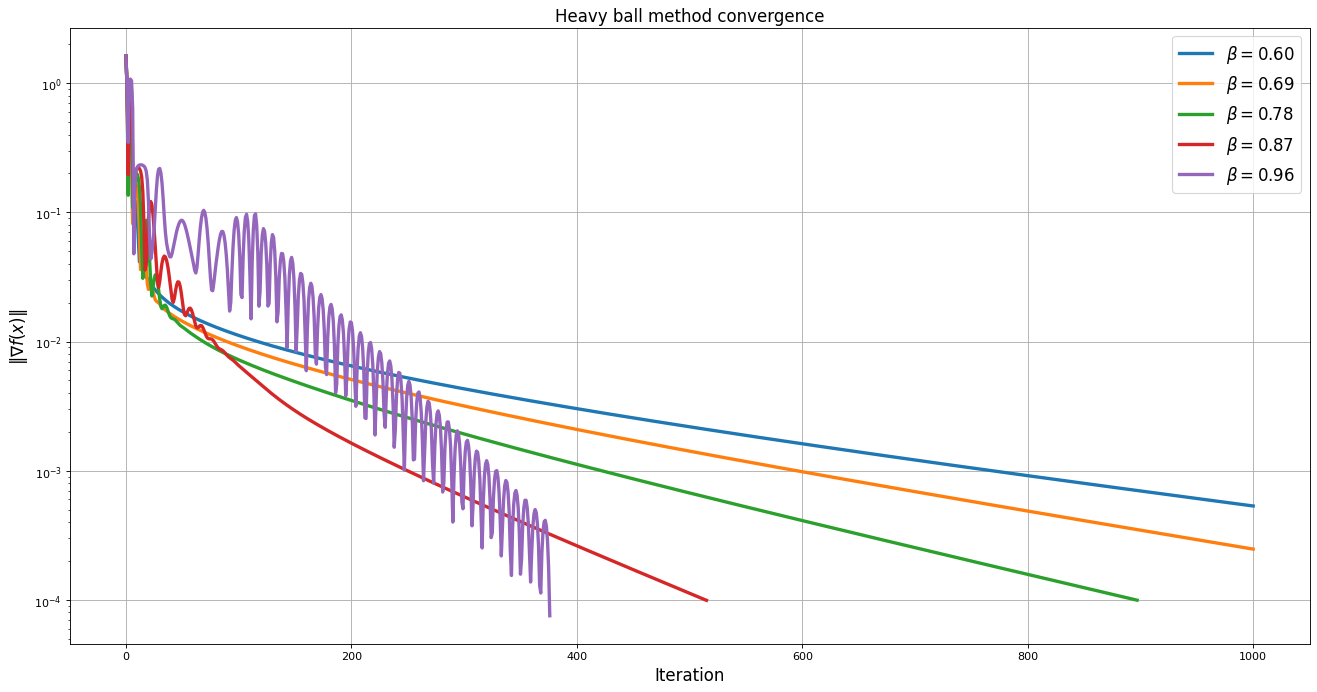

In [14]:
fig = plt.figure()
plt.figure(figsize=(20, 10), dpi=80)
for i, h in enumerate(hists_hb):
    plt.plot(h, label=f"$\\beta={betas_hb[i]:.2f}$", linewidth=3)
    plt.yscale("log")
plt.grid()
plt.title("Heavy ball method convergence", fontsize=15)
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("$\|\\nabla f(x) \|$", fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [15]:
betas_nm = np.arange(0.6, 1, 0.09)
steps_nm = []
hists_nm = []

for beta in betas_nm:

    def indent_beta(k):
        return beta

    x_sol, hist, steps_num, _, _ = nesterov_momentum(
        logistic, logistic_grad, w_0, alpha, indent_beta, reg=reg_lambda, eps=1e-4
    )
    steps_nm.append(steps_num)
    hists_nm.append(hist)

Loss 8.122e-02, Grad norm 1.004e-04:  29%|██▉       | 294/1000 [00:01<00:03, 177.68it/s]


<Figure size 640x480 with 0 Axes>

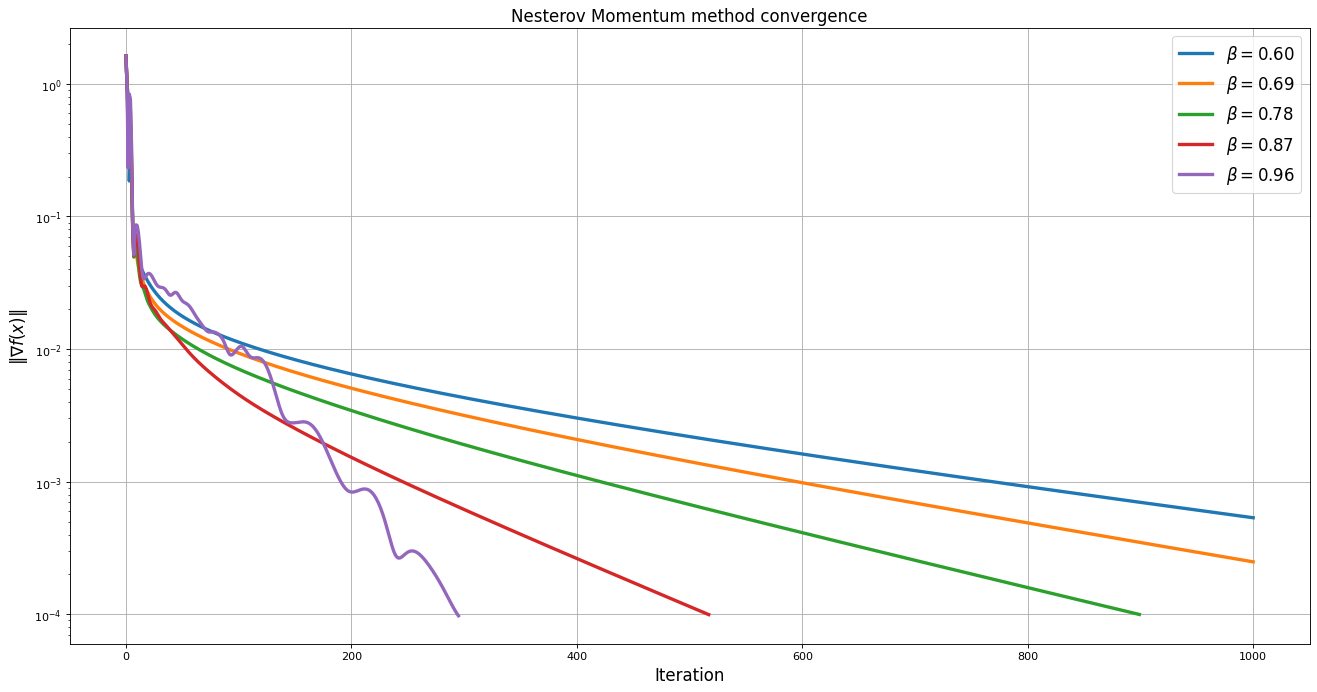

In [16]:
fig = plt.figure()
plt.figure(figsize=(20, 10), dpi=80)
for i, h in enumerate(hists_nm):
    plt.plot(h, label=f"$\\beta={betas_nm[i]:.2f}$", linewidth=3)
    plt.yscale("log")
plt.grid()
plt.title("Nesterov Momentum method convergence", fontsize=15)
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("$\|\\nabla f(x) \|$", fontsize=15)
plt.legend(fontsize=15)
plt.show()

### Step dependent $\beta$

Loss 8.122e-02, Grad norm 1.345e-04:  26%|██▌       | 258/1000 [00:01<00:04, 163.93it/s]


<Figure size 640x480 with 0 Axes>

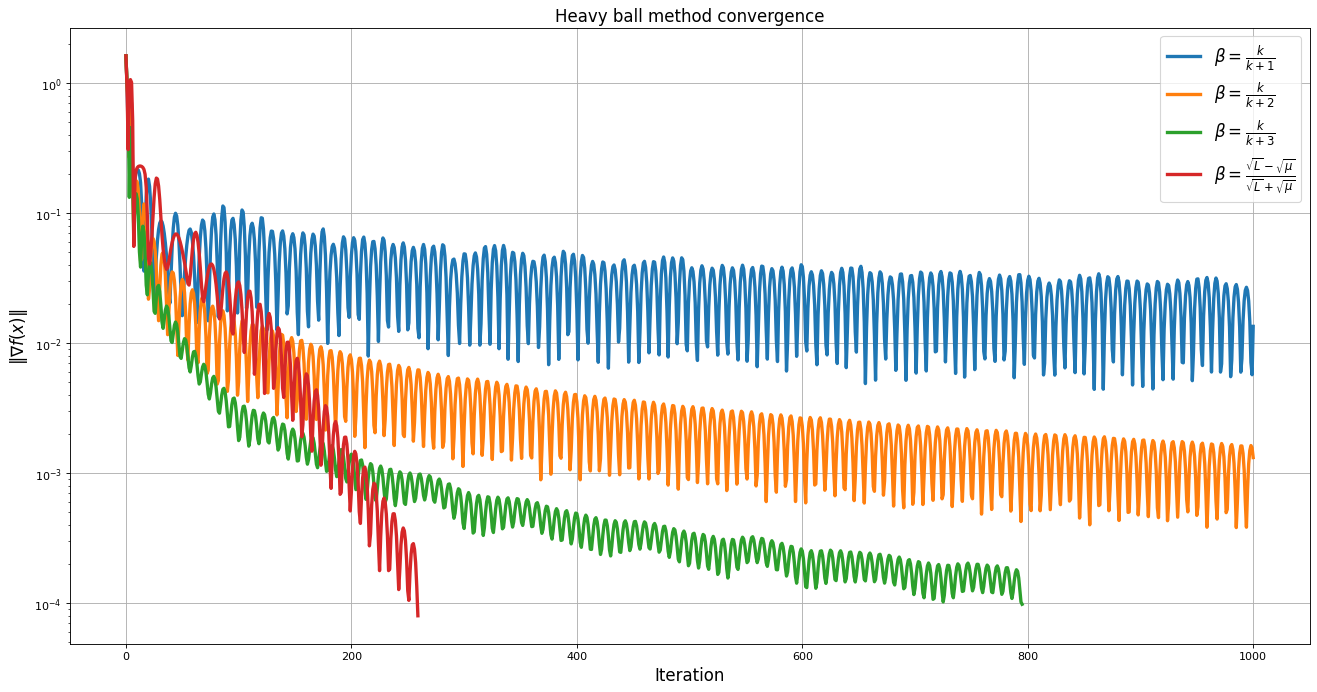

In [17]:
def step_beta1(k):
    return k / (k + 1)


def step_beta2(k):
    return k / (k + 2)


def step_beta3(k):
    return k / (k + 3)


def beta_parametrized(k):
    return (np.sqrt(L) - np.sqrt(mu)) / (np.sqrt(L) + np.sqrt(mu))


steps_sd_heavy_ball = []
history_sd_heavy_ball = []

betas = [step_beta1, step_beta2, step_beta3, beta_parametrized]

for beta in betas:
    x_sol, hist, steps_num, _, _ = heavy_ball(
        logistic, logistic_grad, w_0, alpha, beta, reg=reg_lambda, eps=1e-4
    )
    steps_sd_heavy_ball.append(steps_num)
    history_sd_heavy_ball.append(hist)

fig = plt.figure()
plt.figure(figsize=(20, 10), dpi=80)
plt.plot(history_sd_heavy_ball[0], label="$\\beta=\\frac{k}{k+1}$", linewidth=3)
plt.plot(history_sd_heavy_ball[1], label="$\\beta=\\frac{k}{k+2}$", linewidth=3)
plt.plot(history_sd_heavy_ball[2], label="$\\beta=\\frac{k}{k+3}$", linewidth=3)
plt.plot(
    history_sd_heavy_ball[3],
    label="$\\beta=\\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$",
    linewidth=3,
)
plt.yscale("log")
plt.grid()
plt.title("Heavy ball method convergence", fontsize=15)
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("$\|\\nabla f(x) \|$", fontsize=15)
plt.legend(fontsize=15)
plt.show()

Loss 8.122e-02, Grad norm 1.000e-04:  21%|██        | 206/1000 [00:00<00:03, 228.82it/s]


<Figure size 640x480 with 0 Axes>

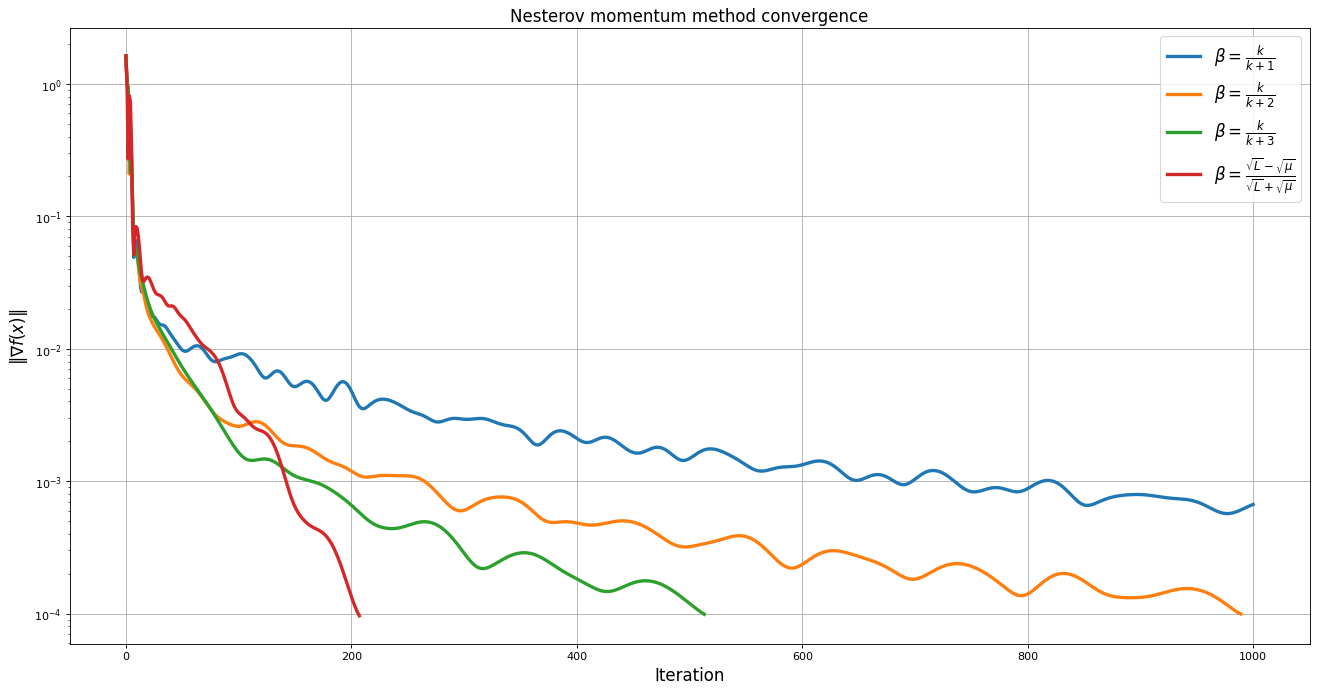

In [18]:
steps_sd_nesterov = []
history_sd_nesterov = []

betas = [step_beta1, step_beta2, step_beta3, beta_parametrized]

for beta in betas:
    x_sol, hist, steps_num, _, _ = nesterov_momentum(
        logistic, logistic_grad, w_0, alpha, beta, reg=reg_lambda, eps=1e-4
    )
    steps_sd_nesterov.append(steps_num)
    history_sd_nesterov.append(hist)


fig = plt.figure()
plt.figure(figsize=(20, 10), dpi=80)
plt.plot(history_sd_nesterov[0], label="$\\beta=\\frac{k}{k+1}$", linewidth=3)
plt.plot(history_sd_nesterov[1], label="$\\beta=\\frac{k}{k+2}$", linewidth=3)
plt.plot(history_sd_nesterov[2], label="$\\beta=\\frac{k}{k+3}$", linewidth=3)
plt.plot(
    history_sd_nesterov[3],
    label="$\\beta=\\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$",
    linewidth=3,
)
plt.yscale("log")
plt.grid()
plt.title("Nesterov momentum method convergence", fontsize=15)
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("$\|\\nabla f(x) \|$", fontsize=15)
plt.legend(fontsize=15)
plt.show()

### Comparison of Heavy Ball method and Nesterov Momentum with the $\beta_{\text{best}}$

<Figure size 640x480 with 0 Axes>

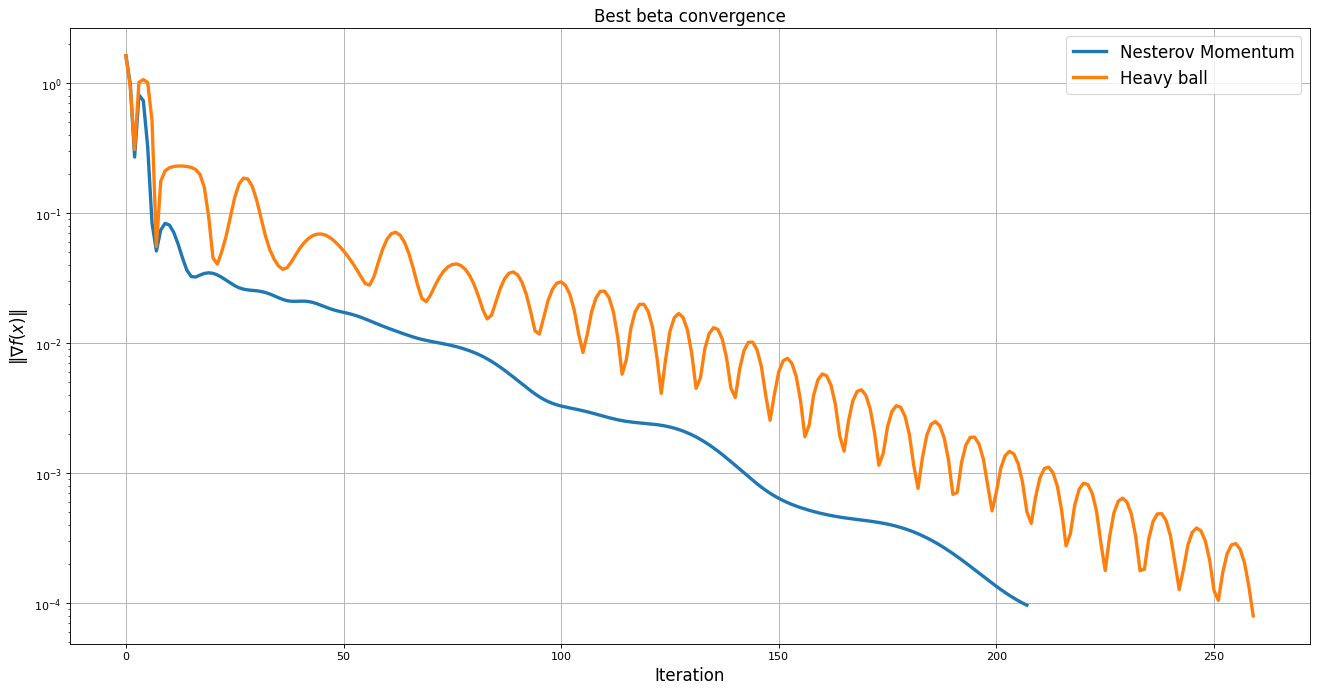

In [19]:
fig = plt.figure()
plt.figure(figsize=(20, 10), dpi=80)
plt.plot(
    history_sd_nesterov[-1], label=f"Nesterov Momentum", linewidth=3
)  # best beta for  NM  beta = (sqrt(L) - sqrt(mu)) / (sqrt(L) + sqrt(mu)))
plt.plot(
    history_sd_heavy_ball[-1], label=f"Heavy ball", linewidth=3
)  # best beta for  HB  beta = (sqrt(L) - sqrt(mu)) / (sqrt(L) + sqrt(mu)))
plt.yscale("log")
plt.grid()
plt.title("Best beta convergence", fontsize=15)
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("$\|\\nabla f(x) \|$", fontsize=15)
plt.legend(fontsize=15)
plt.show()

Best beta for the both methods is $\beta = \frac{\sqrt{L}- \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$

As we can see from the plots heavy ball method convergence is not monotone. This method is always oscilating because of the momentum term. And Nesterov method achieve much more monotonic convergence becasue of it's modifications in the update rule  

__Problem 3. (30 points)__ In this part, we work with the conjugate gradient method. 

__а). (5 points)__ Realize the Fletcher-Reeves and Polak-Ribier method. Describe how you will search for $\alpha_k$ steps (both the algorithm and its initialization are interesting). Add to the algorithms the ability to do "restarts" (sometimes take $\beta_k = 0$) with some frequency that can be customized.

$$
f(w) = \frac{1}{n} \sum\limits_{i=1}^n \ln(1 + \exp{(-y_i w^T x_i)}) + \frac{\lambda}{2} \| w \|^2_2,
$$


$$
\nabla f(w) = \frac{1}{n} \sum \limits_{i=1}^{n} -y_ix_i \sigma{(-w^Tx_iy_i)} + \lambda w
$$

$\alpha_k$ for the conjugate gradients method for general problems defined as following:
$$
\alpha_k = \argmin_{\alpha} \left [ f(x^k + \alpha p_k) \right]
$$ 
For Conjugate Gradients method the most common strategy to define $\alpha$ is iteratively by bracketing and interpolating until some convergence conditions are satisfied.
The most common condition is **Strong Wolfe Condition**, which can be formulated in following way:

$$
f(x_k + \alpha_kp_k) \leq f(x_k) + c_1\alpha_k \nabla f(x_k)^Tp_k
$$
$$
\| \nabla f(x_k + \alpha_kp_k)^Tp_k \| \leq c_2 \|\nabla f(x_k)^Tp_k\|
$$

1) Considering the first condition. It's ensures, what the chosen stepsize $\alpha$ is chosen in the way, that the value of the function $f$ will decrease on the next step, while moving in the direction $p$. By the defenition of step direction we have $p_0 = -\nabla f(x_0)$, so the value of $c_1\alpha_k \nabla f(x_k)^Tp_k$ will be negative. $c_1$ is usually chosen as a small constant in this case I chose $c_1 = 10^{-4}$

2) The seconds condition ensures that that projection of the gradient on the step direction should become less by it's absolute value. Thats indicating a sufficient decrease in the gradient in the search direction. Constant $c_2 \in (0,1)$. It's typically greater than $c_1$, In my case $c_2 = 0.1$

Algorithm of finding $\alpha$ that will satisfy the propesd condition is the following:

1) Initialize $\alpha = \frac{1}{L}$ as for the usual GD and iteratevely find the value, which will holds, the conditions

2) While first condition doesn't holds, that means what function in the direction increase. So, we should decrease the step size. $\alpha = \frac{\alpha}{2}$  

3) Check the second condition. If it doesn't holds we should check 2 possible situations:
     * $\nabla f(x_k + \alpha p_k)^T p_k \geq 0$ means what the gradient at the next point is not a descent direction $\Rightarrow \alpha = \frac{\alpha}{2}$
     * $\nabla f(x_k + \alpha p_k)^T p_k < 0$ means, what the gradient at the next point is descent direction, but it's too little to satisfy the condition $\Rightarrow \alpha = 2 \alpha$

In [20]:
def wolfe_conditions_line_search(f, f_grad, xk, pk, L, c1=1e-4, c2=0.1, max_iter=100):
    # Parameters
    alpha = 1 / L
    max_iterations = max_iter
    iter_count = 0

    while iter_count < max_iterations:
        # Evaluate the function and gradient at the current point
        fk = f(xk)
        grad_fk = f_grad(xk)

        # Compute the potential next point using the given step size
        x_next = xk + alpha * pk

        # Evaluate the function at the potential next point
        fk_next = f(x_next)

        # Compute the Armijo condition
        armijo_condition = fk_next <= fk + c1 * alpha * np.dot(grad_fk, pk)

        if not armijo_condition:
            # Step size is too large, backtrack
            alpha *= 0.5
        else:
            # Compute the curvature condition
            grad_fk_next = f_grad(x_next)
            curvature_condition = np.dot(grad_fk_next, pk) >= c2 * np.dot(grad_fk, pk)

            if curvature_condition:
                # Strong Wolfe conditions are satisfied, return the step size
                return alpha

            # Adjust the step size
            if np.dot(grad_fk_next, pk) >= 0:
                # Gradient at the next point is not a descent direction
                # Choose a smaller alpha
                alpha *= 0.5
            else:
                # Gradient at the next point is a descent direction
                # Choose a larger alpha
                alpha *= 2.0

        iter_count += 1

    # maximum number of iterations is exceeded
    return alpha

In [21]:
def fletcher_reeves_method(
    f,
    nabla_f,
    x_0,
    L,
    K=10**3,
    eps=1e-3,
    iters_to_restart=None,
    X=None,
    y=None,
    quadratic_funcion=False,
    x_true=None,
    reg=0,
    acc=False,
):
    # Initialize the current solution as x_k with the given initial x_0
    x_k = x_0

    # Check if additional data X and y are provided, and define functions accordingly
    if X is not None and y is not None:
        F = lambda w: f(w, X, y)
        Nabla_f = lambda w: nabla_f(w, X, y)
    else:
        F = lambda w: f(w, reg_lambda=reg)
        Nabla_f = lambda w: nabla_f(w, reg_lambda=reg)

    # If quadratic function is specified, compute an initial criterion value
    if quadratic_funcion:
        x0_criterion = np.dot(x_k - x_true, X @ (x_k - x_true))

    # Initialize the search direction as the negative gradient of the objective function
    p_k = -Nabla_f(x_k)

    # Store the initial norm of the gradient
    init_crit = np.linalg.norm(Nabla_f(x_k))

    init_time = time.time()
    progress = tqdm(range(K))

    grad_norm_history = [1]
    time_tiks = [0]
    accs = []
    if acc:
        preds = model_predictions(x_k)
        cur_acc = calc_accuracy(preds)
        accs.append(cur_acc)

    # Main optimization loop
    for k in progress:
        # Perform a line search to determine the step size (alpha)
        alpha = wolfe_conditions_line_search(F, Nabla_f, x_k, p_k, L=L)

        # Update the current solution
        x_k_next = x_k + alpha * p_k

        # Compute the gradients at the current and next solutions
        grad_x_k_next = Nabla_f(x_k_next)
        grad_x_k = Nabla_f(x_k)

        # Compute the beta value for the next search direction
        beta_k = np.dot(grad_x_k_next, grad_x_k_next) / np.dot(grad_x_k, grad_x_k)

        # Optional restart of the search direction
        if (iters_to_restart is not None) and (k + 1) % iters_to_restart == 0:
            beta_k = 0

        # Update the search direction
        p_k = -grad_x_k_next + beta_k * p_k

        # Update the current solution
        x_k = x_k_next

        # Check for convergence based on gradient norm or criterion
        if not quadratic_funcion:
            grad_norm = np.linalg.norm(grad_x_k_next) / init_crit
            grad_norm_history.append(grad_norm)
            time_tiks.append(time.time() - init_time)
            if acc:
                preds = model_predictions(x_k)
                cur_acc = calc_accuracy(preds)
                accs.append(cur_acc)
            if grad_norm < eps:
                return x_k, grad_norm_history, k + 1, time_tiks, accs
            progress.set_description(
                f"Loss: {F(x_k):.3e}, Gradient norm: {grad_norm:.3e}"
            )

        # For quadratic functions, check convergence based on the criterion
        if quadratic_funcion:
            cur_criterion = np.dot(x_k - x_true, X @ (x_k - x_true)) / x0_criterion
            progress.set_description(f"Criterion: {cur_criterion:.3e}")
            grad_norm_history.append(cur_criterion)
            time_tiks.append(time.time() - init_time)
            if cur_criterion < eps:
                return x_k, grad_norm_history, k + 1, time_tiks, accs

    # If maximum iterations are reached, return the current solution and other information
    return x_k, grad_norm_history, K, time_tiks, accs


w0 = np.random.rand(X.shape[1])
w_k, _, _, t, acc_res = fletcher_reeves_method(
    logistic, logistic_grad, w0, L_with_reg, eps=1e-4, reg=reg_lambda
)

y_pred_train = model_predictions(w_k, X_train)
y_pred_test = model_predictions(w_k, X_test)
print(f"accuracy of test set: {calc_accuracy(y_pred_test, y_test)}")
print(f"accuracy of train set: {calc_accuracy(y_pred_train, y_train)}")

Loss: 9.927e-02, Gradient norm: 2.999e-02:   1%|          | 11/1000 [00:00<00:20, 48.50it/s]

Loss: 8.122e-02, Gradient norm: 1.172e-04:   9%|▉         | 93/1000 [00:02<00:20, 43.80it/s]

accuracy of test set: 0.9963076923076923
accuracy of train set: 0.99523003539006


In [22]:
def polak_ribiere_method(
    f,
    nabla_f,
    x_0,
    L,
    K=10**3,
    eps=1e-3,
    iters_to_restart=None,
    X=None,
    y=None,
    quadratic_funcion=False,
    x_true=None,
    reg=0,
    acc=False,
):
    # Initialize the current solution as x_k with the given initial x_0
    x_k = x_0

    # Check if additional data X and y are provided, and define functions accordingly
    if X is not None and y is not None:
        F = lambda w: f(w, X, y)
        Nabla_f = lambda w: nabla_f(w, X, y)
    else:
        F = lambda w: f(w, reg_lambda=reg)
        Nabla_f = lambda w: nabla_f(w, reg_lambda=reg)

    # If quadratic function is specified, compute an initial criterion value
    if quadratic_funcion:
        x0_criterion = np.dot(x_k - x_true, X @ (x_k - x_true))

    # Initialize the search direction as the negative gradient of the objective function
    p_k = -Nabla_f(x_k)

    # Store the initial norm of the gradient
    init_crit = np.linalg.norm(Nabla_f(x_k))

    init_time = time.time()
    progress = tqdm(range(K))

    grad_norm_history = [1]
    time_tiks = [0]
    accs = []
    if acc:
        preds = model_predictions(x_k)
        cur_acc = calc_accuracy(preds)
        accs.append(cur_acc)

    # Main optimization loop
    for k in progress:
        # Perform a line search to determine the step size (alpha)
        alpha = wolfe_conditions_line_search(F, Nabla_f, x_k, p_k, L=L)

        # Update the current solution
        x_k_next = x_k + alpha * p_k

        # Compute the gradients at the current and next solutions
        grad_x_k_next = Nabla_f(x_k_next)
        grad_x_k = Nabla_f(x_k)

        # Compute the beta value for the next search direction
        beta_k = np.dot(grad_x_k_next, (grad_x_k_next - grad_x_k)) / np.dot(
            grad_x_k, grad_x_k
        )

        # Optional restart of the search direction
        if (iters_to_restart is not None) and (k + 1) % iters_to_restart == 0:
            beta_k = 0

        # Update the search direction
        p_k = -grad_x_k_next + beta_k * p_k

        # Update the current solution
        x_k = x_k_next

        # Check for convergence based on gradient norm or criterion
        if not quadratic_funcion:
            grad_norm = np.linalg.norm(grad_x_k_next) / init_crit
            grad_norm_history.append(grad_norm)
            time_tiks.append(time.time() - init_time)
            if acc:
                preds = model_predictions(x_k)
                cur_acc = calc_accuracy(preds)
                accs.append(cur_acc)

            if grad_norm < eps:
                return x_k, grad_norm_history, k + 1, time_tiks, accs
            progress.set_description(
                f"Loss: {F(x_k):.3e}, Gradient norm: {grad_norm:.3e}"
            )

        # For quadratic functions, check convergence based on the criterion
        if quadratic_funcion:
            cur_criterion = np.dot(x_k - x_true, X @ (x_k - x_true)) / x0_criterion
            progress.set_description(f"Criterion: {cur_criterion:.3e}")
            grad_norm_history.append(cur_criterion)
            time_tiks.append(time.time() - init_time)
            if cur_criterion < eps:
                return x_k, grad_norm_history, k + 1, time_tiks, accs

    # If maximum iterations are reached, return the current solution and other information
    return x_k, grad_norm_history, K, time_tiks, accs


w0 = np.random.rand(X.shape[1])
w_k, _, _, t, a = polak_ribiere_method(
    logistic, logistic_grad, w0, L_with_reg, eps=1e-4, reg=reg_lambda
)

y_pred_train = model_predictions(w_k, X_train)
y_pred_test = model_predictions(w_k, X_test)
print(f"accuracy of test set: {calc_accuracy(y_pred_test, y_test)}")
print(f"accuracy of train set: {calc_accuracy(y_pred_train, y_train)}")

Loss: 8.855e-01, Gradient norm: 6.327e-01:   0%|          | 2/1000 [00:00<00:54, 18.36it/s]

Loss: 8.122e-02, Gradient norm: 2.544e-04:   7%|▋         | 70/1000 [00:04<00:53, 17.44it/s]

accuracy of test set: 0.9963076923076923
accuracy of train set: 0.99523003539006


__b). (10 points)__ Solve the optimization problem with two implemented methods, varying the frequency of "restarts" for each: $1$ (every iteration $\beta_k = 0$), $10$ (every tenth iteration $\beta_k = 0$), $100$, $1000$, no restarts.

Draw three plots: 1) the convergence criterion values from iteration number for the Fletcher-Reeves method with different restart frequencies, 2) the convergence criterion values from iteration number for the Polak-Ribier method with different restart frequencies, 3) the convergence criterion values from iteration number for both methods with the best choice of restart frequency. Make a conclusion.

In [23]:
np.random.seed(42)
x0 = np.random.rand(X_train.shape[1])

In [24]:
restart_frequency = [1, 10, 100, 1000, None]
best_frequency_fr = -1
best_k_fr = 1e5
hists_fr = []

for iters in restart_frequency:
    x_k, criterion_hist, k, timestamps, _ = fletcher_reeves_method(
        logistic,
        logistic_grad,
        x0.copy(),
        iters_to_restart=iters,
        eps=1e-6,
        K=2000,
        reg=reg_lambda,
        L=L_with_reg,
    )
    hists_fr.append(criterion_hist)
    if k < best_k_fr:
        best_k_fr = k
        best_frequency_fr = iters

Loss: 8.122e-02, Gradient norm: 1.141e-06:  17%|█▋        | 345/2000 [00:05<00:26, 61.63it/s]


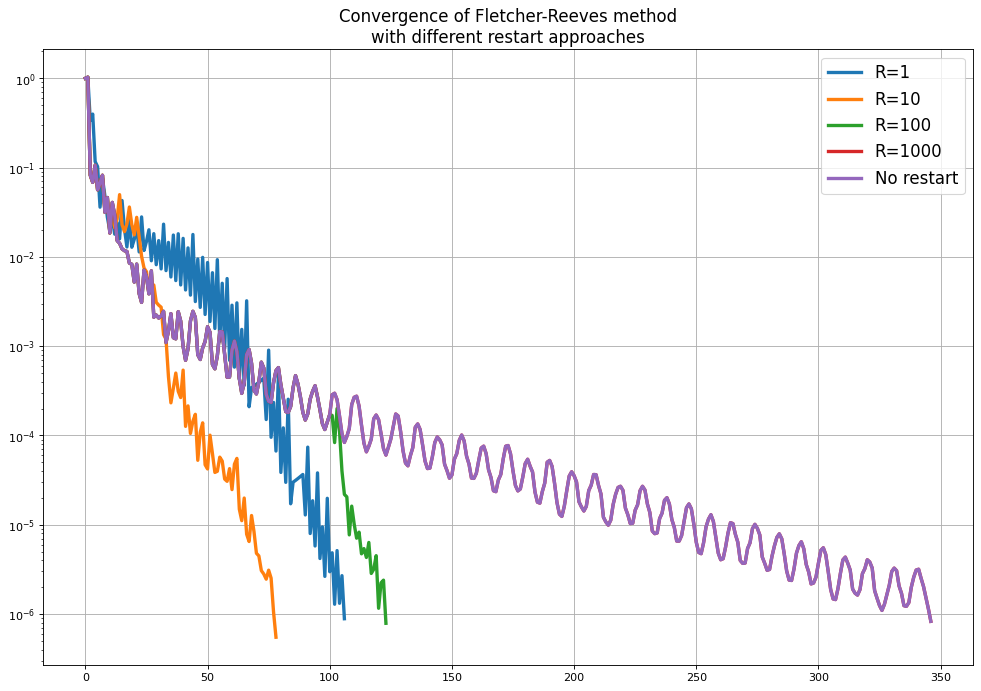

In [25]:
plt.figure(figsize=(15, 10), dpi=80)
for i, h in enumerate(hists_fr):
    l = f"R={restart_frequency[i]}"
    if restart_frequency[i] is None:
        l = "No restart"
    plt.plot(h, label=l, linewidth=3)

plt.yscale("log")
plt.legend(fontsize=15)
plt.grid()
plt.title(
    "Convergence of Fletcher-Reeves method\nwith different restart approaches",
    fontsize=15,
)
plt.show()

In [26]:
restart_frequency = [1, 10, 100, 1000, None]
best_frequency_pr = -1
best_k_pr = 1e5
hists_pr = []

for iters in restart_frequency:
    x_k, criterion_hist, k, timestamps, _ = polak_ribiere_method(
        logistic,
        logistic_grad,
        x0,
        eps=1e-6,
        iters_to_restart=iters,
        reg=reg_lambda,
        L=L_with_reg,
    )
    hists_pr.append(criterion_hist)
    if k < best_k_pr:
        best_k_pr = k
        best_frequency_pr = iters

Loss: 8.122e-02, Gradient norm: 1.019e-06:   8%|▊         | 78/1000 [00:02<00:24, 37.36it/s]


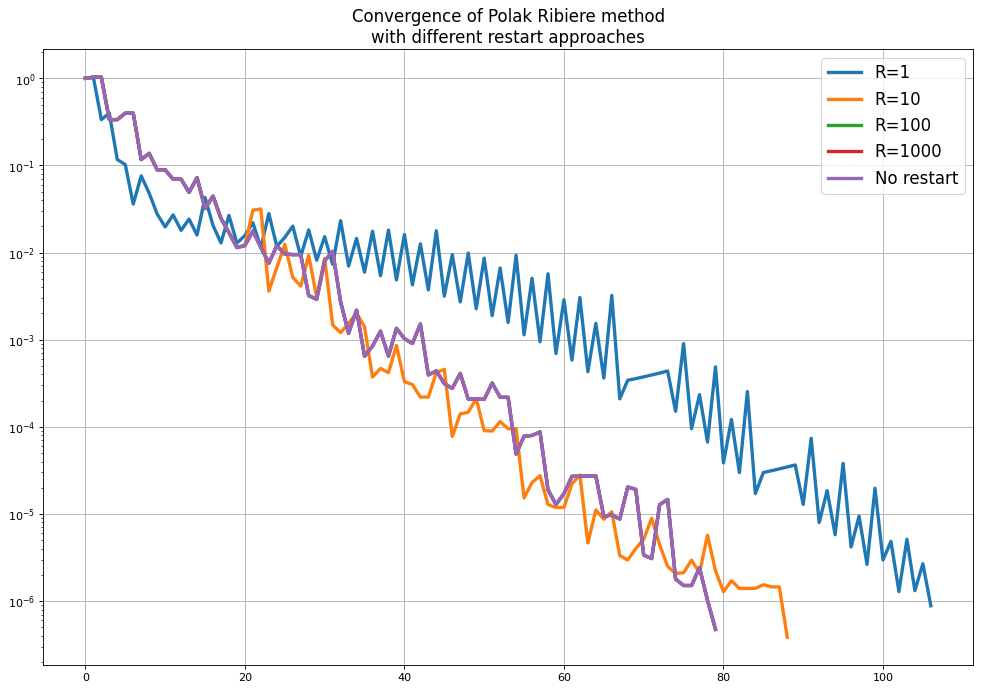

In [27]:
plt.figure(figsize=(15, 10), dpi=80)

for i, h in enumerate(hists_pr):
    l = f"R={restart_frequency[i]}"
    if restart_frequency[i] is None:
        l = "No restart"
    plt.plot(h, label=l, linewidth=3)

plt.yscale("log")
plt.legend(fontsize=15)
plt.grid()
plt.title(
    "Convergence of Polak Ribiere method\nwith different restart approaches",
    fontsize=15,
)
plt.show()

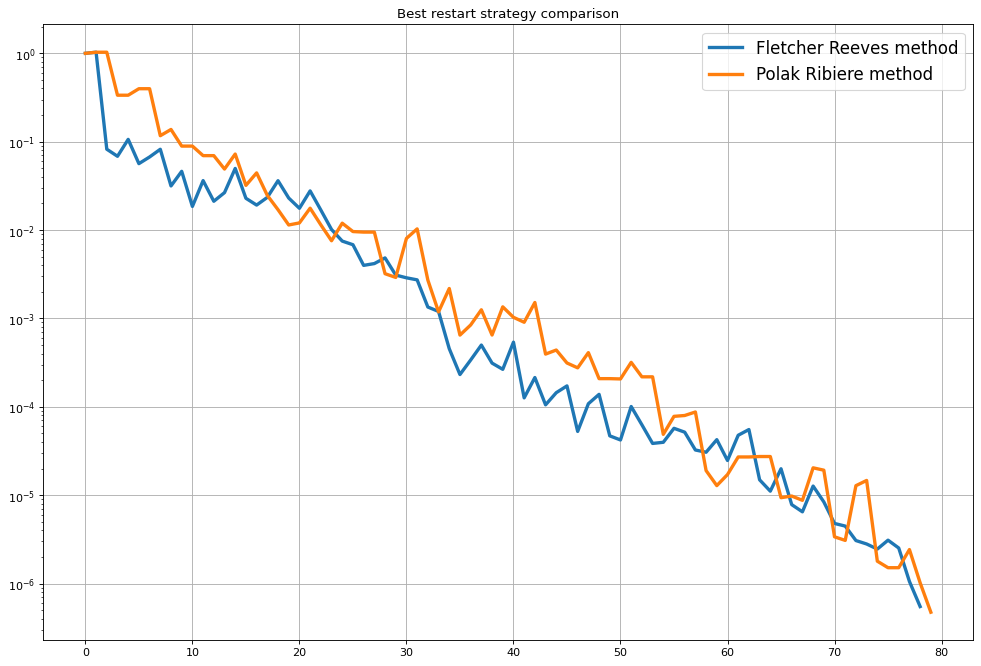

In [28]:
plt.figure(figsize=(15, 10), dpi=80)

best_frequency_fr, best_frequency_pr
fr_best_id = restart_frequency.index(best_frequency_fr)
pr_best_id = restart_frequency.index(best_frequency_pr)
plt.plot(hists_fr[fr_best_id], label="Fletcher Reeves method", linewidth=3)
plt.plot(hists_pr[pr_best_id], label="Polak Ribiere method", linewidth=3)
plt.yscale("log")
plt.grid()
plt.legend(fontsize=15)
plt.title("Best restart strategy comparison")
plt.show()

From the results on the plots above we can see that for the bset restarting criterion Fletcher Reeves method converge with the same rate as the Polak Ribiere method. The best restart strategy for the Fletcher Reeves is to restart every 10 steps and for Polak Ribiere is not to restart. From this we can make a conclusion that the  Polak Ribiere method is more robust.


From the comparison of the restart techniques plot we can see that for the Fletcher Reeves the worst strategy is not to restart at all. In the Fletcher Reeves method we should find a balance between keeping history and restarting. 

And for the Polak Ribiere method restarting every step performs worse then all the other methods. That means that the Polak Ribiere is more robust regarding the accumulated history. Restaring every 10 steps also performs pretty good, but restarting every step(standart GD) performs worse. 

---

__c). (15 points)__ In this part we abstract from the regression problem. Let us study the properties of the conjugate gradient method for the quadratic problem:
$$\min_{x \in \mathbb{R}^d} \left[\tfrac{1}{2} x^T A x - b x \right]$$
with a positive definite symmetric matrix $A \in \mathbb{R}^{d \times d}$ and some vector $b \in \mathbb{R}^d$. We need to learn how to generate a matrix $A$ with the possibility to specify its spectrum (eigenvalues). The previous assignment already asked us to do this. We suggest the following approach based on the decomposition $A = Q D Q^T$, where $D$ is a diagonal matrix formed from eigenvalues and $Q$ is orthogonal (it can be generated using the $QR$-decomposition of a random matrix).

Suppose we have a quadratic problem whose matrix $A \in \mathbb{R}^{d \times d}$ has clustered eigenvalues, meaning, that there exists some number of clusters $k \leq d$ and values $\tilde \lambda_1 < \ldots < \tilde \lambda_k$ such that for any $\lambda_i$ eigenvalue of matrix $A$ there exists $j \leq k$ such that $\lambda_i \in [(1 - p) \tilde \lambda_j; (1 + p) \tilde \lambda_j]$, where $p < 1$.

Then we will need to generate clustered eigenvalues and then the matrix $A$. When generating the spectrum, try to make sure that all values in it are different. As a convergence criterion, use $\frac{\| x^k - x^* \|^2_A} {\| x^0 - x^* \|^2_A}$, where $k$ is the iteration number and $\| x \|^2_A = \langle x, Ax \rangle$. 

Let us test the performance of the conjugate gradient method for different variants of eigenvalue clustering:

1) Let $d = 100$, $k = 2$, $p = 0.05$, $\tilde \lambda_1 = 1$, there are 50 eigenvalues each in the clusters for $\tilde \lambda_1$ and $\tilde \lambda_2$. Vary the value of $\tilde \lambda_2$ from $10$ to $10^5$ (5 different values is enough). Plot the values of the convergence criterion from the iteration number for each value of $\tilde \lambda_2$ on one plot. Make a conclusion.

2) Let $d = 100$, $k = 2$, $p = 0.05$, $\tilde \lambda_1 = 1$, $\tilde \lambda_2 = 1000$. Vary the number of eigenvalues in each cluster from $1$ to $99$ (5 different values is enough). Plot the values of the convergence criterion from the iteration number for each value of cluster size for $\tilde \lambda_1$ on one plot. Make a conclusion.

3) Let $d = 100$, $p = 0.05$, $\tilde \lambda_1 = 1$, $\tilde \lambda_k = 1000$. Vary the number of clusters $k$ from 2 to 100 (5 different values is enough, include 100 - corresponds to a uniform distribution of eigenvalues). Plot the values of the convergence criterion from the number of iterations for each value of $k$ on one plot. Make a conclusion.

In [29]:
def generate_matrix(d, eigen_vals):
    random_matrix = np.random.rand(d, d)
    Q, _ = np.linalg.qr(random_matrix)
    D = np.diag(eigen_vals)
    # np.linalg.eigvalsh(Q @ D @ Q.T)
    return Q @ D @ Q.T


def clusterize_eigenvalues(p, lambdas, cluster_elems):
    clusterized_eigs = []
    for i, cur_lambda in enumerate(lambdas):
        for j in range(cluster_elems[i]):
            min_val = cur_lambda * (1 - p)
            max_val = cur_lambda * (1 + p)
            clustered_eig_val = np.random.uniform(min_val, max_val)
            clusterized_eigs.append(clustered_eig_val)
    return clusterized_eigs

In [30]:
def quadratic(x, A, b):
    return 0.5 * (x.T @ A @ x) - (b @ x)


def quadratic_grad(x, A, b):
    return A @ x - b

In [31]:
np.random.seed(42)
x0 = np.random.rand(100)

In [32]:
d = 100
k = 2
p = 0.05
lambda2_variants = [10, 100, 10**3, 10**4, 10**5]
hists = []
np.random.seed(0)

for l in lambda2_variants:
    ls = [1, l]
    cluster_elems = [50, 50]
    eigen_vals = clusterize_eigenvalues(p, ls, cluster_elems)
    A = generate_matrix(d, eigen_vals)
    b = np.random.rand(d)
    x_true = np.linalg.inv(A) @ b
    L = max(eigen_vals)
    x_k, grad_norm_hist, steps, _, _ = fletcher_reeves_method(
        quadratic,
        quadratic_grad,
        x0,
        X=A,
        y=b,
        eps=1e-8,
        iters_to_restart=d,
        x_true=x_true,
        quadratic_funcion=True,
        L=L,
    )
    hists.append(grad_norm_hist)

Criterion: 9.994e-09:   4%|▍         | 41/1000 [00:00<00:02, 449.72it/s]


Criterion: 8.857e-09:   2%|▏         | 17/1000 [00:00<00:06, 148.62it/s]


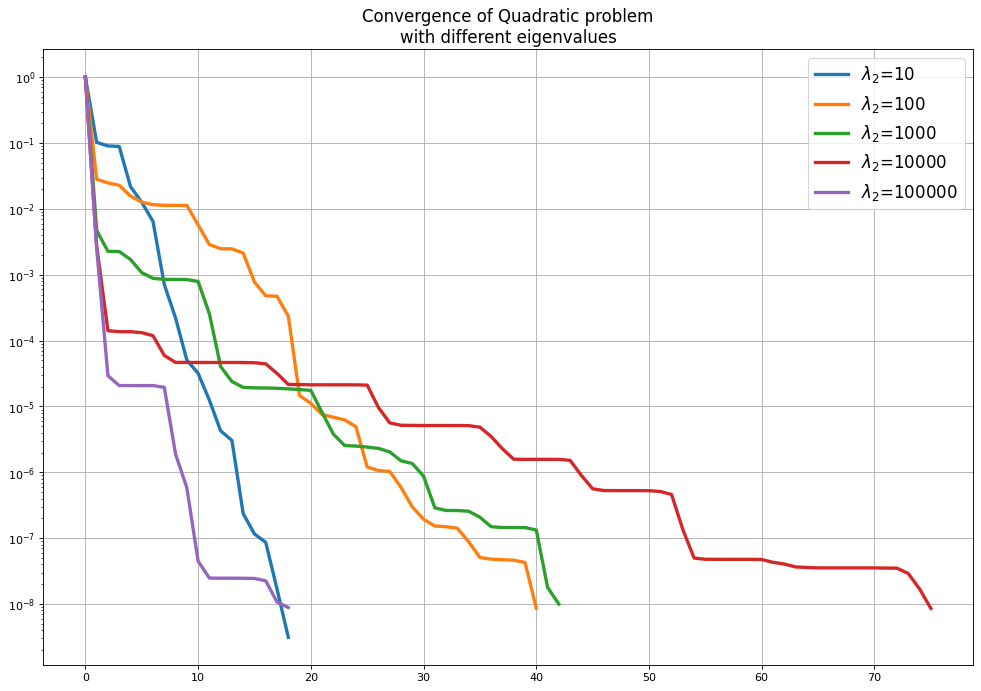

In [33]:
plt.figure(figsize=(15, 10), dpi=80)

for i, h in enumerate(hists):
    l = f"$\lambda_2$={lambda2_variants[i]}"
    plt.plot(h, label=l, linewidth=3)

plt.yscale("log")
plt.legend(fontsize=15)
plt.grid()
plt.title("Convergence of Quadratic problem\nwith different eigenvalues", fontsize=15)
plt.show()

From the graph above we can see, that the case with $\tilde \lambda_2 = 10$ converges faster then all the others. From this we can make a conclusion, that the big $L$ smoothness constant negatively affcts the convergence rate of the Conjugate Gradients method. Also this may means that the variance of the aigenvalues may have negative affection on the convergence rate

Criterion: 4.203e-07:   0%|          | 0/1000 [00:00<?, ?it/s]

Criterion: 9.979e-09:   7%|▋         | 71/1000 [00:00<00:03, 258.00it/s]


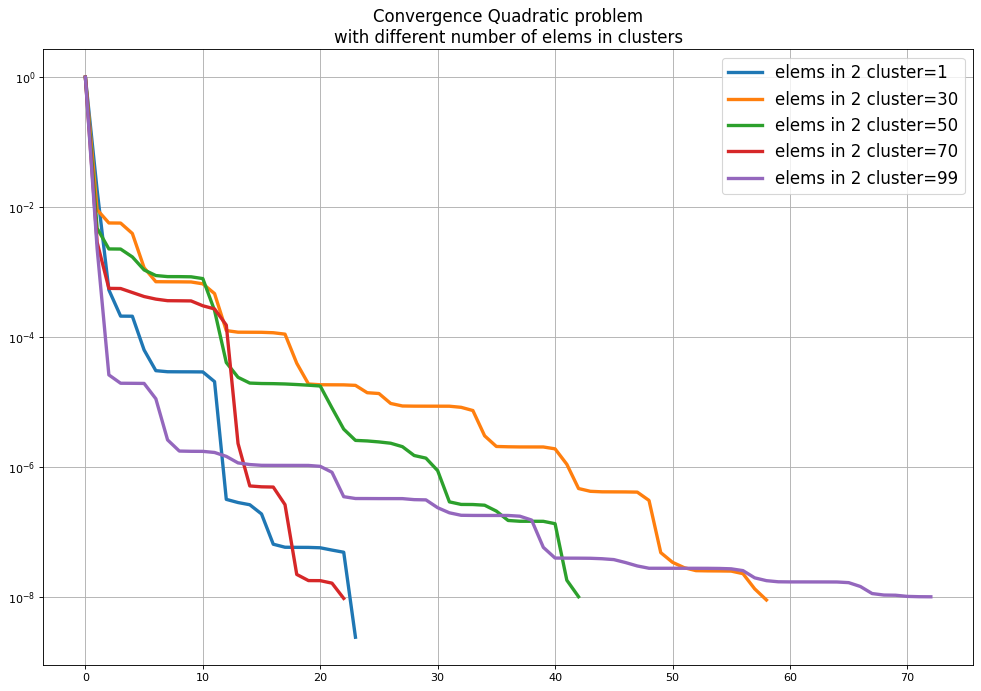

In [34]:
d = 100
k = 2
p = 0.05
cluster_num = [1, 30, 50, 70, 99]
hists = []
np.random.seed(0)

for c in cluster_num:
    ls = [1, 1000]
    cluster_elems = [d - c, c]
    eigen_vals = clusterize_eigenvalues(p, ls, cluster_elems)
    A = generate_matrix(d, eigen_vals)
    b = np.random.rand(d)
    x_true = np.linalg.inv(A) @ b
    L = max(eigen_vals)
    x_k, grad_norm_hist, steps, _, _ = fletcher_reeves_method(
        quadratic,
        quadratic_grad,
        x0.copy(),
        X=A,
        y=b,
        eps=1e-8,
        iters_to_restart=None,
        x_true=x_true,
        quadratic_funcion=True,
        L=L,
    )
    hists.append(grad_norm_hist)

plt.figure(figsize=(15, 10), dpi=80)

for i, h in enumerate(hists):
    l = f"elems in 2 cluster={cluster_num[i]}"
    plt.plot(h, label=l, linewidth=3)

plt.yscale("log")
plt.legend(fontsize=15)
plt.grid()
plt.title(
    "Convergence Quadratic problem\nwith different number of elems in clusters",
    fontsize=15,
)
plt.show()

The method converges in faster then most of the eigenvalues (99 out of 100) have little magnitude $\tilde \lambda_1 = 1$. That means that big mean value of eigenvalues has a bad effect of the convergence rate of the method.

Criterion: 9.900e-09:  30%|███       | 302/1000 [00:00<00:02, 333.86it/s]


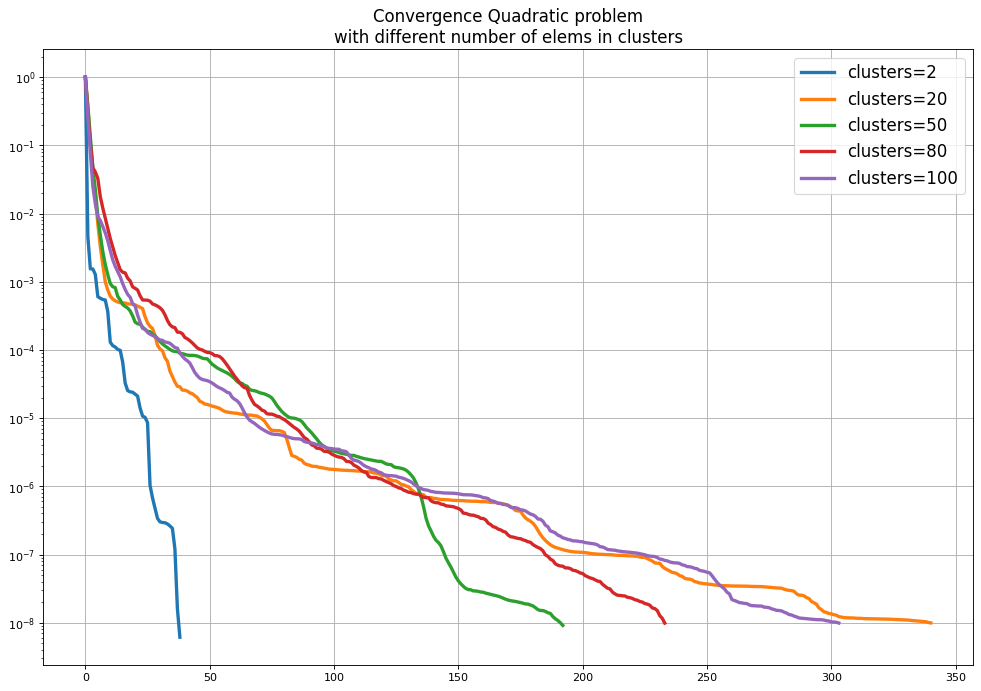

In [35]:
d = 100
k = 2
p = 0.05
clusters_num = [2, 20, 50, 80, 100]
hists = []
np.random.seed(0)

for clusters in clusters_num:
    lambda_min, lambda_max = 1, 1000
    lambdas = np.linspace(lambda_min, lambda_max, num=clusters)
    cluster_elems = np.zeros(len(lambdas), dtype=np.int32)
    for i in range(d):
        ind = np.random.randint(0, len(cluster_elems))
        cluster_elems[ind] += 1
    eigen_vals = clusterize_eigenvalues(p, lambdas, cluster_elems)
    A = generate_matrix(d, eigen_vals)
    b = np.random.rand(d)
    x_true = np.linalg.inv(A) @ b
    L = max(eigen_vals)
    x_k, grad_norm_hist, steps, _, _ = fletcher_reeves_method(
        quadratic,
        quadratic_grad,
        x0,
        X=A,
        y=b,
        eps=1e-8,
        iters_to_restart=None,
        x_true=x_true,
        quadratic_funcion=True,
        L=L,
    )
    hists.append(grad_norm_hist)

plt.figure(figsize=(15, 10), dpi=80)

for i, h in enumerate(hists):
    l = f"clusters={clusters_num[i]}"
    plt.plot(h, label=l, linewidth=3)

plt.yscale("log")
plt.legend(fontsize=15)
plt.grid()
plt.title(
    "Convergence Quadratic problem\nwith different number of elems in clusters",
    fontsize=15,
)
plt.show()

From the plot above we can make a conclusion, that method converges faster with the less number of eigenvalue clusters. 

__Problem 4. (25 points)__ Now let us talk about Newton method and quasi-Newton methods.

__а). (5 points)__ For the regression problem, implemnt and run Newton method. Does it converge? If not, try running the gradient descent method for several iterations first before using Newton method. Vary the number of gradient descent steps. Plot the value of convergence criterion versus iteration number for the combination of gradient descent and Newton method with different number of gradient descent steps. Make a conclusion. 

In [36]:
def newton_method(
    f,
    nabla_f,  # The gradient (first derivative) of the objective function
    nabla2_f,  # The Hessian matrix (second derivative) of the objective function
    x0,  # The initial guess or starting point for optimization
    eps=1e-6,
    K=10**3,
    grad_steps=0,  # Number of GD iterations before Newton method
    gamma=1e-3,  # Step size for GD
    reg_param=0.5,  # Regularization parameter
    acc=False,
):
    # Initialize the current estimate of the optimal solution, gradient norm, and other variables
    xk = x0
    init_norm = np.linalg.norm(nabla_f(xk))
    progress = tqdm(range(K))  # Create a progress bar for tracking iterations
    criterion_hist = [1]  # List to store the convergence criterion over iterations
    time_tiks = [0]  # List to store elapsed time at each iteration
    init_time = time.time()  # Record the initial time
    accs = []  # List to store accuracy values

    if acc:
        preds = model_predictions(xk)
        cur_acc = calc_accuracy(preds)
        accs.append(cur_acc)

    # Start the main optimization loop with a maximum of K iterations
    for k in progress:
        grad_k = nabla_f(
            xk, reg_lambda=reg_param
        )  # Calculate the gradient at the current point

        # After reaching the specified number of gradient descent steps, calculate the Hessian
        if k >= grad_steps:
            hess_k = nabla2_f(xk, reg_lambda=reg_param)

        # Calculate the convergence criterion and update the progress bar description
        criterion = np.linalg.norm(nabla_f(xk, reg_lambda=reg_param)) / init_norm
        progress.set_description(f"criterion: {criterion:.3e}")
        criterion_hist.append(criterion)  # Store the criterion for analysis
        time_tiks.append(time.time() - init_time)  # Store the elapsed time

        if acc:
            preds = model_predictions(xk)
            cur_acc = calc_accuracy(preds)
            accs.append(cur_acc)

        # Check for convergence based on the specified tolerance (eps)
        if criterion < eps:
            return xk, criterion_hist, k + 1, time_tiks, accs

        # Update the current estimate using either gradient descent or Newton's method
        if k < grad_steps:
            xk = xk - gamma * grad_k  # Update using gradient descent
        else:
            hess_k_inv = np.linalg.inv(hess_k)
            newton_step_direction = hess_k_inv @ grad_k
            xk = xk - newton_step_direction  # Update using Newton's method

    # If the maximum number of iterations is reached without convergence, return the results
    return xk, criterion_hist, K, time_tiks, accs

criterion: 3.472e-01:   0%|          | 0/1000 [00:00<?, ?it/s]

criterion: 3.037e-03: 100%|██████████| 1000/1000 [00:05<00:00, 190.80it/s]


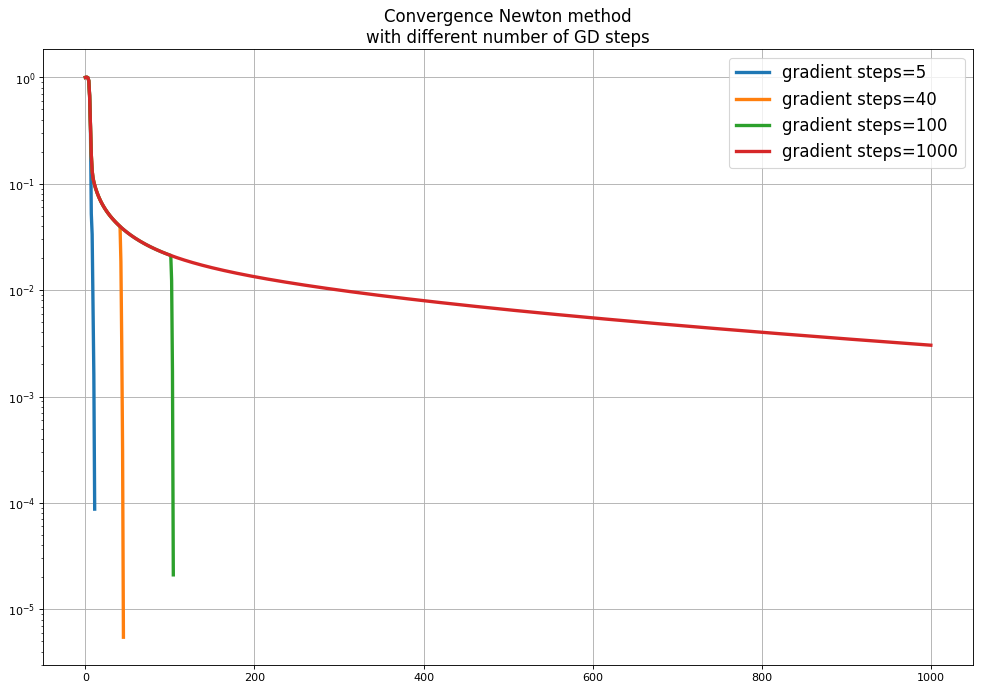

In [37]:
np.random.seed(42)
x0 = np.random.rand(X_train.shape[1])
grad_steps = [5, 40, 100, 1000]
hists = []
for g in grad_steps:
    x_k, hist, k, t, _ = newton_method(
        logistic,
        logistic_grad,
        logistic_hessian,
        x0,
        grad_steps=g,
        gamma=1 / L_wo_reg,
        eps=1e-4,
        reg_param=reg_lambda,
    )
    hists.append(hist)

plt.figure(figsize=(15, 10), dpi=80)

for i, h in enumerate(hists):
    l = f"gradient steps={grad_steps[i]}"
    plt.plot(h, label=l, linewidth=3)

plt.yscale("log")
plt.legend(fontsize=15)
plt.grid()
plt.title(
    "Convergence Newton method\nwith different number of GD steps",
    fontsize=15,
)
plt.show()

Large number of gradient steps make the convergence of the Newton method worse. So, for this method we should performs as little as posible gradient steps. Thay are needed only to get into the local range of the Newton method for it to not diverge. 

__b). (7 points)__ Implement the quasi-Newton method BFGS. Use it to solve the regression problem. Add it to the plot from the previous point about Newton method. Make a conclusion.

In [38]:
def BFGS(f, nabla_f, x0, H_0, L, eps=1e-4, K=10**3, reg=0, acc=False):
    xk = x0
    H_k = H_0  # Initial approximation of the Hessian matrix
    Hessian_shape = H_k.shape[0]  # Determine the shape of the Hessian matrix
    init_norm = np.linalg.norm(
        nabla_f(xk, reg_lambda=reg)
    )  # Calculate the initial gradient norm
    criterion_hist = [1]
    time_tiks = [0]
    init_time = time.time()
    accs = []  # List to store accuracy values

    if acc:
        preds = model_predictions(xk)
        cur_acc = calc_accuracy(preds)
        accs.append(cur_acc)

    progress = tqdm(range(K))

    # Start the main optimization loop with a maximum of K iterations
    for k in progress:
        grad_xk = nabla_f(
            xk, reg_lambda=reg
        )  # Calculate the gradient at the current point
        pk = -H_k @ grad_xk  # Calculate the search direction using the BFGS update

        # Define a line search function for finding the step size (alpha)
        linesearch_f = lambda w: f(w, reg_lambda=reg)
        linesearch_nabla_f = lambda w: nabla_f(w, reg_lambda=reg)
        alpha = wolfe_conditions_line_search(
            linesearch_f, linesearch_nabla_f, xk, pk, c2=0.9, L=L
        )

        crit = (
            np.linalg.norm(grad_xk) / init_norm
        )  # Calculate the convergence criterion
        criterion_hist.append(crit)  # Store the criterion for analysis
        time_tiks.append(time.time() - init_time)  # Store the elapsed time

        # If accuracy tracking is enabled, calculate and store the accuracy at this iteration
        if acc:
            preds = model_predictions(xk)
            cur_acc = calc_accuracy(preds)
            accs.append(cur_acc)

        progress.set_description(f"Criterion {crit:.3e}")

        # Check for convergence based on the specified tolerance (eps)
        if crit <= eps:
            return xk, criterion_hist, k + 1, time_tiks, accs

        if np.isnan(crit):
            raise RuntimeError  # Raise an error if convergence fails

        xk = xk + alpha * pk  # Update the current estimate with the step size
        grad_xk_next = nabla_f(xk, reg_lambda=reg)
        yk = grad_xk_next - grad_xk
        sk = alpha * pk

        I = np.identity(Hessian_shape)
        pho_k = 1 / (yk.T @ sk)  # Calculate the update scaling factor
        first = I - pho_k * np.outer(sk, yk)
        second = I - pho_k * np.outer(yk, sk)

        # Update the Hessian approximation using the BFGS formula
        H_k = first @ H_k @ second
        H_k += pho_k * np.outer(sk, sk)

    # If the maximum number of iterations is reached without convergence, return the results
    return xk, criterion_hist, K, time_tiks, accs


H0 = np.identity(X.shape[1])
x_k, quasi_newton_hist, steps, t, acc_res = BFGS(
    logistic, logistic_grad, x0, H0, eps=1e-4, reg=reg_lambda, L=L_with_reg
)
hists.append(quasi_newton_hist)

Criterion 9.740e-05:  12%|█▏        | 122/1000 [00:01<00:07, 113.31it/s]


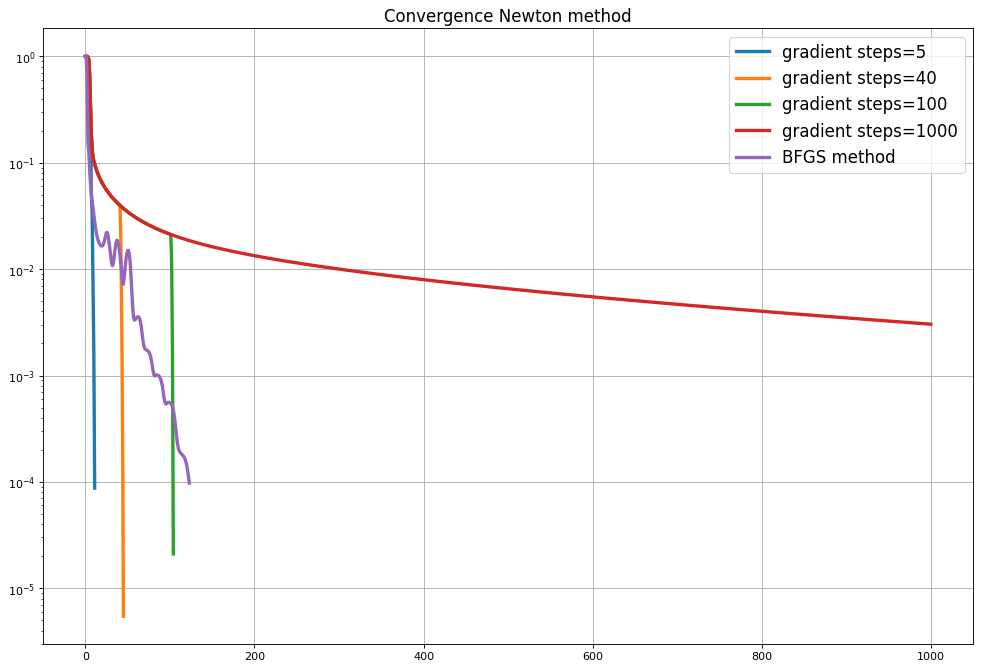

In [39]:
plt.figure(figsize=(15, 10), dpi=80)

for i, h in enumerate(hists):
    if i == len(hists) - 1:
        l = "BFGS method"
    else:
        l = f"gradient steps={grad_steps[i]}"
    plt.plot(h, label=l, linewidth=3)

plt.yscale("log")
plt.legend(fontsize=15)
plt.grid()
plt.title(
    "Convergence Newton method",
    fontsize=15,
)
plt.show()

Quasi-Newton method converges slower then the ordinary Newton method. But steps of Quasi-Newton method takes less time, as we dont need to calculate Hessian of the function in the each step of the method and what's more inverse it.

__c). (13 points)__ Let us again depart from regression and consider a one-dimensional minimization problem:
\begin{equation}
\min_{x \in \mathbb{R}} f(x) = x \arctan x - \frac{1}{2} \log (1 + x^2).
\end{equation}
Solve this problem using Newton method. Draw convergence plots of the method for two different starting points $x^0 = 1.3$ and $x^0 = 1.5$. Make a conclusion.

To achieve convergence of Newton method it is not necessary to resort to using another method as a stratum method. Realize two modifications of Newton method: damped (adding a step) and cubic Newton method (see [paper](https://link.springer.com/article/10.1007/s10107-006-0706-8)). Do these methods solve the convergence problem of Newton method for the starting point $x^0 = 1.5$? In the damped method, try taking a step from $0.5$ to $1$. Draw the convergence plots. Make a conclusion.

In [40]:
# given function
def arctan_f(x):
    return x * np.arctan(x) - 0.5 * np.log(1 + x**2)


# it's derivative
def nabla_arctan_f(x):
    return np.arctan(x)


# second derivative
def nabla2_arctan_f(x):
    return 1 / (1 + x**2)


def single_dimensional_newton_method(
    f,
    nabla_f,
    nabla2_f,
    x0,
    eps=1e-6,
    K=10**3,
    damped_step=False,  # Flag to use damped step size (default is False)
    h=0,  # Step size (only used if damped_step is True, default is 0)
    cubic=False,  # Flag to use cubic convergence (default is False)
):
    xk = x0
    init_norm = np.linalg.norm(nabla_f(xk))  # Calculate the initial gradient norm
    progress = tqdm(range(K))
    criterion_hist = []

    # Start the main optimization loop with a maximum of K iterations
    for k in progress:
        grad_k = nabla_f(xk)  # Calculate the derivative at the current point
        hess_k = nabla2_f(xk)  # Calculate the second derivative at the current point
        fk = f(xk)  # Calculate the value of the objective function

        criterion = (
            np.linalg.norm(nabla_f(xk)) / init_norm
        )  # Calculate the convergence criterion
        progress.set_description(f"criterion: {criterion:.3e}")
        criterion_hist.append(criterion)

        # Check for convergence based on the specified tolerance (eps)
        if criterion < eps:
            return xk, criterion_hist, k + 1

        hess_k_inv = 1 / hess_k  # Calculate the inverse of the second derivative

        if cubic:
            # Update the current estimate using cubic convergence formula
            xk = xk - (2 * fk * grad_k) / (2 * grad_k**2 - fk * hess_k)
        else:
            newton_step_direction = (
                hess_k_inv * grad_k
            )  # Calculate the Newton step direction

            if damped_step and k == 0:
                xk = (
                    xk - h * newton_step_direction
                )  # Update with a damped step (in the first iteration)
            else:
                xk = xk - newton_step_direction  # Update without a damped step

    # If the maximum number of iterations is reached without convergence, return the results
    return xk, criterion_hist, K

criterion: 8.623e-07:   1%|▏         | 13/1000 [00:00<00:00, 1362.13it/s]


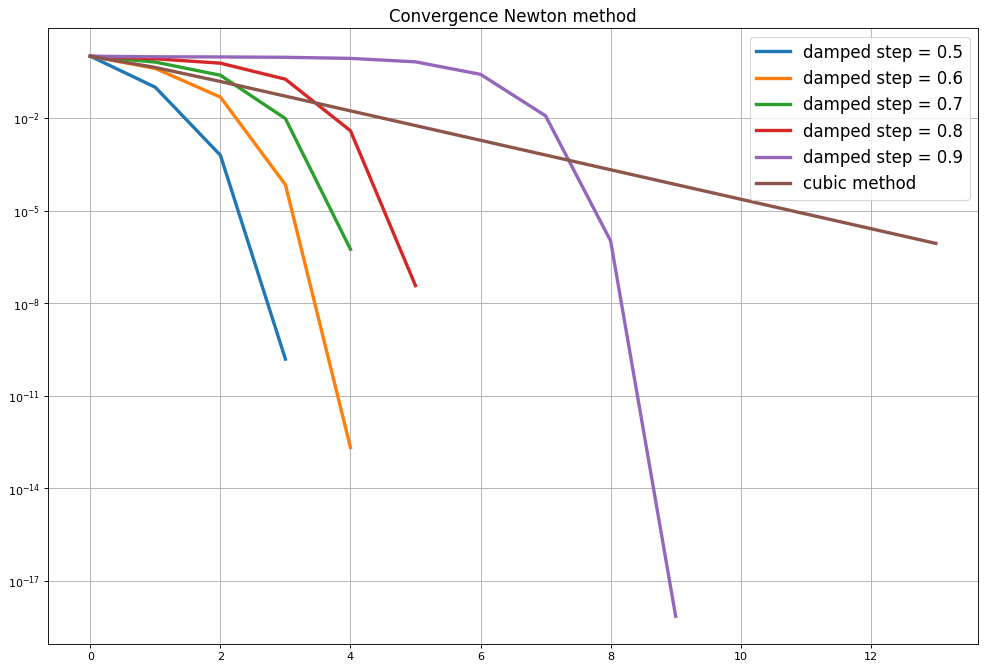

In [41]:
x0 = 1.5
hs = [0.5, 0.6, 0.7, 0.8, 0.9, 0]
hists = []
for damped_stepsize in hs:
    damp = True
    h = damped_stepsize
    cubic = False
    if damped_stepsize == 0:
        damp = False
        cubic = True
    x_k, arctan_hist, steps = single_dimensional_newton_method(
        arctan_f,
        nabla_f=nabla_arctan_f,
        nabla2_f=nabla2_arctan_f,
        x0=x0,
        damped_step=damp,
        h=damped_stepsize,
        cubic=cubic,
    )
    hists.append(arctan_hist)

plt.figure(figsize=(15, 10), dpi=80)
for i, h in enumerate(hists):
    if i == len(hists) - 1:
        l = "cubic method"
    else:
        l = f"damped step = {hs[i]}"
    plt.plot(h, label=l, linewidth=3)

plt.yscale("log")
plt.legend(fontsize=15)
plt.grid()
plt.title(
    "Convergence Newton method",
    fontsize=15,
)
plt.show()

From the resulting plot above we can see, that both damped step and cubic Newton method help the method to converge form the point $x_0 = 1.5$. From comparing different coefficients for the first damped step we can see that the less coefficient $h$ leads to the more smooth and therefore faster convergence. Cubic Newton method converges slover and much more smoothly then the default Newton method.

__Problem 5. (5 points)__ It remains to combine the results obtained in Problems 1-4. For this purpose, let us remember that the original regression problem is a machine learning problem and that the linear model $g$ can be used to predict the values of labels $y$. How do we use the final model for prediction? After answering the question, make predictions on a test sample $X_{test}$. Compare with the actual $y_{test}$ labels. The number of correctly guessed labels is the accuracy/accuracy of the model. Compare the gradient descent method, heavy ball method, accelerated gradient method, Fletcher-Reeves method, Polak-Ribier method, Newton method, BFGS. Construct two plots: the value of convergence criterion from running time and the prediction accuracy from running time. Make a conclusion.

In [42]:
np.random.seed(42)
w0 = np.random.random(X.shape[1])
L = logistic_smoothness(X_train, 0)
reg_lambda = L / 1000
L = logistic_smoothness(X_train, reg_lambda)
mu = reg_lambda
alpha = 1 / L

def beta_parametrized(k):
    return (np.sqrt(L) - np.sqrt(mu)) / (np.sqrt(L) + np.sqrt(mu))




xk, gd_hist, _, gd_timestamps, gd_accs = heavy_ball(
    logistic,
    logistic_grad,
    w0,
    alpha=1 / L,
    beta=lambda x: 0,  # GD is same as heavy ball method, but with beta = 0
    eps=1e-4,
    reg=reg_lambda,
    acc=True,
)

xk, heavy_ball_hist, _, heavy_ball_timestamps, heavy_ball_accs = heavy_ball(
    logistic,
    logistic_grad,
    w0,
    alpha=1 / L,
    beta=beta_parametrized,  # best beta according to the 2
    eps=1e-4,
    reg=reg_lambda,
    acc=True,
)

xk, nesterov_momentum_hist, _, nesterov_momentum_timestamps, nesterov_momentum_accs = nesterov_momentum(
    logistic,
    logistic_grad,
    w0,
    alpha=1 / L,
    beta=beta_parametrized,  # best beta according to the 2
    eps=1e-4,
    reg=reg_lambda,
    acc=True,
)

xk, polak_ribiere_hist, _, polak_ribiere_timestamps, polak_ribiere_accs = polak_ribiere_method(
    logistic, logistic_grad, w0, L, eps=1e-4, reg=reg_lambda, acc=True
)

xk, fletcher_reeves_hist, _, fletcher_reeves__timestamps, fletcher_reeves__accs = fletcher_reeves_method(
    logistic, logistic_grad, w0, L, eps=1e-4, reg=reg_lambda, acc=True
)

xk, newton_hist, _, newton_timestamps, newton_accs = newton_method(
    logistic,
    logistic_grad,
    logistic_hessian,
    w0,
    grad_steps=20,
    gamma=1 / L,
    eps=1e-4,
    reg_param=reg_lambda,
    acc=True,
)

H0 = np.identity(w0.shape[0])
xk, BFGS_hist, _, BFGS_timestamps, BFGS_accs = BFGS(
    logistic, logistic_grad, w0, H0, eps=1e-4, reg=reg_lambda, L=L, acc=True
)

Loss 2.437e-01, Grad norm 5.833e-02:   0%|          | 0/1000 [00:00<?, ?it/s]

Criterion 9.740e-05:  12%|█▏        | 122/1000 [00:01<00:12, 70.99it/s]


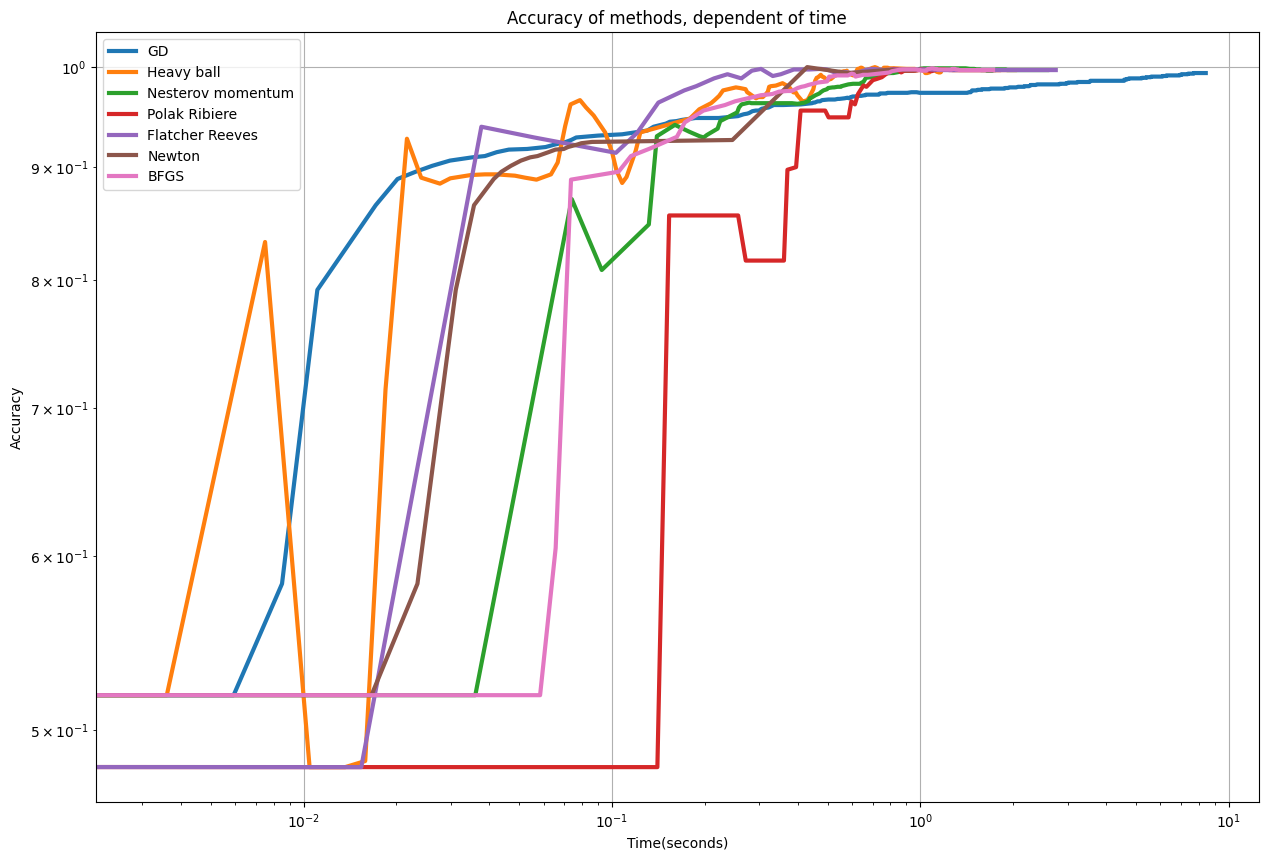

In [43]:
figure = plt.figure(figsize=(15, 10))
plt.plot(gd_timestamps, gd_accs, linewidth=3, label='GD')
plt.plot(heavy_ball_timestamps, heavy_ball_accs, linewidth=3, label='Heavy ball')
plt.plot(nesterov_momentum_timestamps, nesterov_momentum_accs, linewidth=3, label='Nesterov momentum')
plt.plot(polak_ribiere_timestamps, polak_ribiere_accs, linewidth=3, label="Polak Ribiere")
plt.plot(fletcher_reeves__timestamps, fletcher_reeves__accs, linewidth=3, label='Flatcher Reeves')
plt.plot(newton_timestamps, newton_accs, linewidth=3, label='Newton')
plt.plot(BFGS_timestamps, BFGS_accs, linewidth=3, label='BFGS')
plt.grid()
plt.yscale("log")
plt.legend()
plt.xscale("log")
plt.title("Accuracy of methods, dependent of time")
plt.xlabel("Time(seconds)")
plt.ylabel("Accuracy")
plt.show()

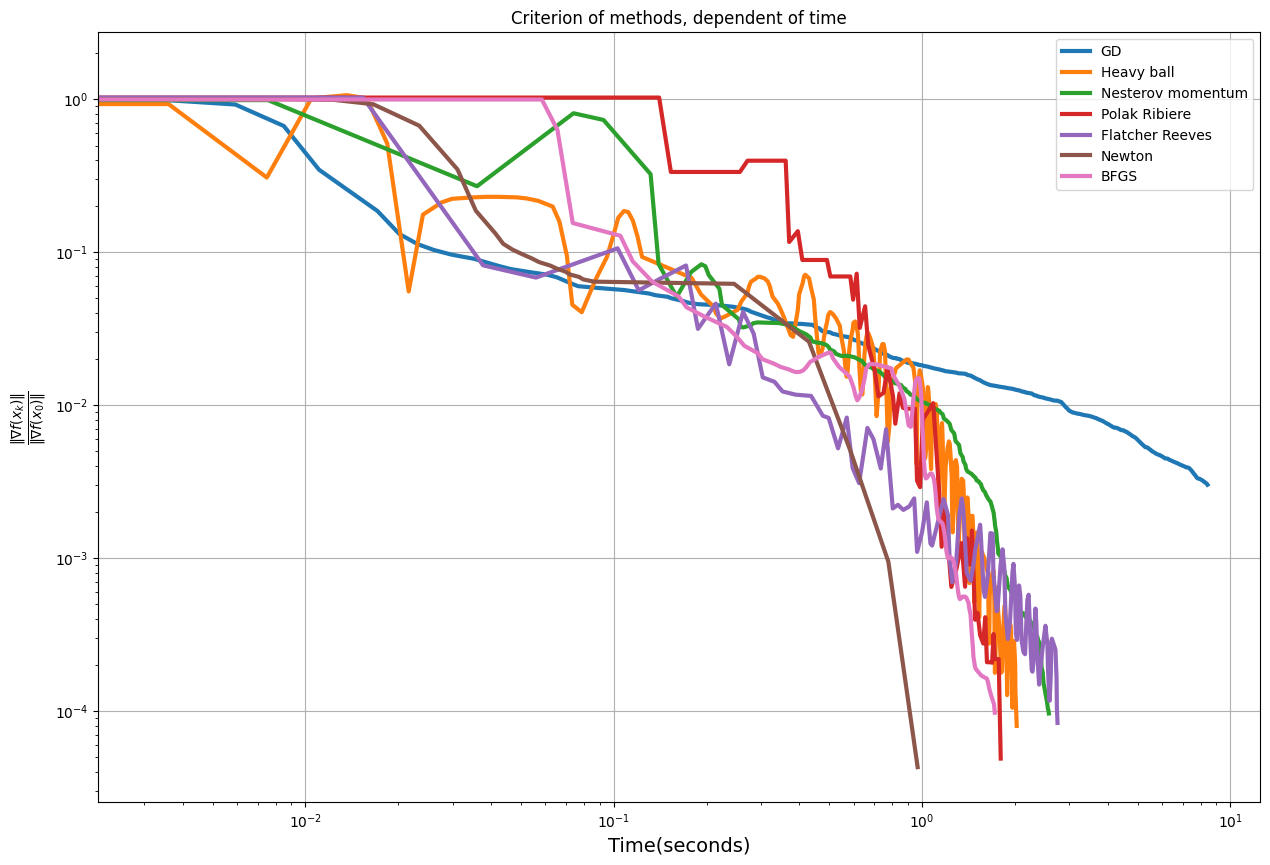

In [44]:
figure = plt.figure(figsize=(15, 10))
plt.plot(gd_timestamps, gd_hist, linewidth=3, label='GD')
plt.plot(heavy_ball_timestamps, heavy_ball_hist, linewidth=3, label='Heavy ball')
plt.plot(nesterov_momentum_timestamps, nesterov_momentum_hist, linewidth=3, label='Nesterov momentum')
plt.plot(polak_ribiere_timestamps, polak_ribiere_hist, linewidth=3, label="Polak Ribiere")
plt.plot(fletcher_reeves__timestamps, fletcher_reeves_hist, linewidth=3, label='Flatcher Reeves')
plt.plot(newton_timestamps, newton_hist, linewidth=3, label='Newton')
plt.plot(BFGS_timestamps, BFGS_hist, linewidth=3, label='BFGS')
plt.grid()
plt.yscale("log")
plt.legend()
plt.xscale("log")
plt.title("Criterion of methods, dependent of time")
plt.xlabel("Time(seconds)", fontsize=14)
plt.ylabel("$\\frac{\|\\nabla f(x_k) \| }{\| \\nabla f(x_0) \| }$", fontsize=14)
plt.show()

From the plot above it's visible (hardly visible) that the best Best method for the given task in terms of accuaracy and time is Flatcher Reeves method. And if we will compare convergence criterion of all the methods, the best results shows Newton method. 